<b>Vinicius F. Caridá</b>

# Machine LEarning and GenAI - Vini Caridá
Linkedin:https://www.linkedin.com/in/viniciuscarida/

Twitter/X: https://twitter.com/vfcarida

Youtube: https://www.youtube.com/@ViniciusFCarida


<h1 style="text-align:center"> Machine Learning Hands-On - Parte 1 </h1>

<h3 class="title"> Links úteis: </h3>
<br>
<ol>
  <li class="item"><a href = "http://scikit-learn.org/stable/"> Sklearn</a>: principal biblioteca de aprendizado de máquina para python.</li>
  <li class="item"><a href = "http://pandas.pydata.org/pandas-docs/stable/"> Pandas</a>: (quase) tudo o que você precisa para trabalhar rapidamente com tabelas</li>
  <li class="item"><a href = "https://docs.scipy.org/doc/numpy/reference/index.html"> Numpy</a>: funções matemáticas estão aqui</li>
  <li class="item"><a href = "https://matplotlib.org/contents.html"> Matplotlib</a>: te ajuda a plotar!</li>
  <li class="item"><a href = "https://seaborn.pydata.org/api.html"> Seaborn</a>: Deixa a matplotlib bonita (contém plots mais bem estruturados)</li>
</ol>

<b>Trabalharemos com as seguintes bases de dados:</b>
- weights.csv
- Boston.csv

<b>Testem a leitura de um dos arquivos deste curso</b>
- Acessem a documentação da função <i>read_csv</i> do <i>pandas</i>: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

<h2 style="text-align:center; margin:40px"> Regressão Linear </h2>

<img src="img/house_prices.png"/>

A <b>regressão linear</b> é uma técnica de aprendizado supervisionado que encontra um estimador linear $y \approx f(x)$ onde $y$ é a variável resposta e $x \in \mathbb{R}^m$ ($m$ variáveis preditivas).

Se $x \in \mathbb{R}$ (uma única variável preditiva), então $f(x) = ax+b$.

Podemos re-rescrever a função como $ f_{\beta}(x) = {\beta_0} + {\beta_1}x $.

Se $x$ é dado por $m$ variáveis preditivas, então $ f_{\beta}(x) = {\beta_0} + {\beta_1}x_1 + ... + {\beta_n}x_m$.

Os termos $\beta$ são denominados coeficientes, e são encontrados pelo regressor de forma a melhor se adequar aos dados.

<p style="margin-bottom:1cm;"></p>
<h2 style="text-align:center;">Como encontrar os melhores coeficientes?</h2>
<p style="margin-bottom:1cm;"></p>

<b> Método tradicional (mínimos quadrados): </b> Seja $X$ a matriz com variáveis preditivas e $y$ a variável resposta, queremos encontrar $\beta$ tal que $X\beta = y$. Se $X$ for invertível, então claramente $\beta$ = $X^{-1}y$. Quando $X$ não é invertível, podemos obter a melhor solução possível usando a pseudo-inversa de $X$: $\beta$ = $X^+y$ = $(X^TX)^{-1}X^Ty$.

<b> Método numérico (gradiente descendente): </b> Podemos definir o erro de uma predição $f_{\beta}(x_i)$ como $L(x_i, y_i) = (f_{\beta}(x_i) - y_i)^2$.

![](img/erro_reg.png)

Então podemos definir o erro total (ou custo) de um modelo como a média de cada erro individual:

$$ J(f_\beta, y) = \frac{1}{N} \sum_{i = 1}^{N} L(x_i, y_i)$$

O que queremos é minimizar $J(f_\beta, y)$ em termos de $\beta$. A solução $\beta$ encontrada será exatamente a mesma dada pelo método de mínimos quadrados.

<p style="margin-bottom:1cm;"></p>
<h2 style="text-align:center;">Como minimizar?</h2>
<p style="margin-bottom:1cm;"></p>

Podemos inicializar os valores de cada $\beta_i$ aleatoriamente, e então melhorar nosso chute inicial utilizando as <b>derivadas parciais</b> de $J(f_\beta, y)$:

$$\beta_{i} := \beta_{i} - \alpha \, \frac{\partial J}{\partial \beta_{i}}$$

O parâmetro $\alpha$ é chamado de <b>taxa de aprendizado</b>, e é um parâmetro extremamente importante principalmente no treinamento de <b>redes neurais</b>

![](img/gradiente.gif)

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn).

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.2.


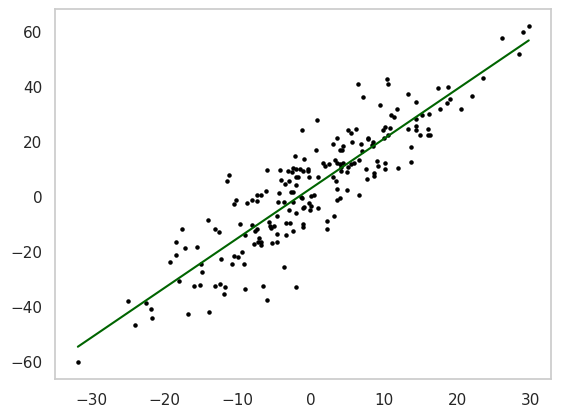

In [5]:
baseDados = baseDados = pd.read_csv('./base_regressao_1.csv')
LR = LinearRegression()
X = baseDados[['X']]
Y = baseDados.Y
LR.fit(X,Y)

plt.plot(baseDados.X, LR.predict(baseDados[['X']]), c = 'darkgreen')
plt.scatter(baseDados.X, baseDados.Y, s = 5, c = 'black')

Vamos realizar um o primeiro exercício que consiste em uma regressão linear simples, analisando peso, altura e sexo de 200 pessoas

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

Vamos começar lendo os dados do arquivo .csv

In [7]:
pesos = pd.read_csv('./weights.csv', sep=';')

In [8]:
pesos.head()

sex  weight  height
0   M      77     182
1   F      58     161
2   F      53     161
3   M      68     177
4   F      59     157

In [9]:
pesos.loc[pesos.sex=='F']['weight'].max()

160

array([[<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'height'}>]], dtype=object)

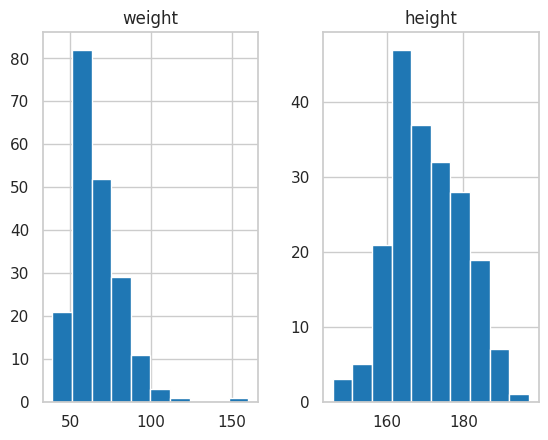

In [11]:
pesos.hist()

In [12]:
pesos.dtypes

sex       object
weight     int64
height     int64
dtype: object

In [13]:
pesos.shape

(200, 3)

<Axes: >

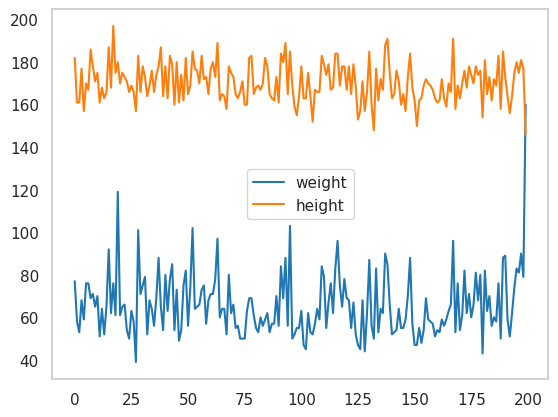

In [14]:
pesos.plot()

A fim de obtermos mais detalhes sobre os dados numéricos, podemos usar o método describe()

Com isso, obtemos o número de exemplos, a média de cada atributo, desvio padrão, valor mínimo, primeiro, segundo e terceiro quartil e valor máximo do atributo, respectivamente.

In [17]:
pesos.describe()

weight     height
count  200.000000  200.00000
mean    65.770000  170.46500
std     14.899567    9.09408
min     39.000000  146.00000
25%     55.000000  164.00000
50%     63.000000  169.50000
75%     74.000000  177.25000
max    160.000000  197.00000

Para valores discretos podemos usar o método value_counts()

In [18]:
pesos.sex.value_counts()

sex
F    112
M     88
Name: count, dtype: int64

Nesta base temos 112 pessoas do sexo feminino e 88 do sexo masculino

Vamos visualizar esses dados graficamente

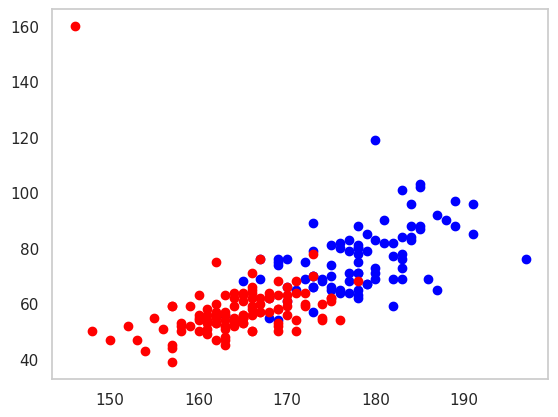

In [19]:
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'],
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'],
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')

Aqui encontramos um problema. Exitem alguns pontos muito fora da distribuição de dados (160, 120), esses pontos são os outliers. Eles podem prejudicar o modelo, porque forçarão a reta para próximo deles. Temos que removê-los.
<br>Veja também que os pesos das pessoas de sexo masculino estão deslocados para a direita, o que indica uma tendência de homens serem mais pesados que as mulheres. Nosso modelo nos mostrará isso.

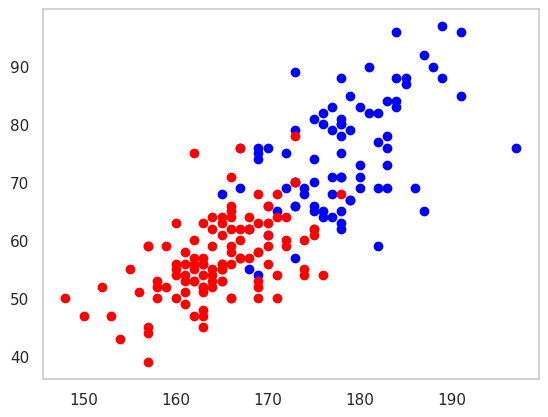

In [20]:
pesos = pesos[pesos.weight <= 100]
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'],
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'],
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')

Como visto em aula, para o caso de variáveis categóricas devemos utilizar "dummy variables". O método get_dummies do pandas cuida disso. Teremos um valor binário onde 1 corresponde a masculino e 0 a feminino

In [21]:
pesos.head()

sex  weight  height
0   M      77     182
1   F      58     161
2   F      53     161
3   M      68     177
4   F      59     157

In [22]:
dummies_sex = pd.get_dummies(pesos.sex, drop_first=True)
dummies_sex.head()

M
0   True
1  False
2  False
3   True
4  False

Anexamos as novas colunas à nossa base de dados. Axis = 1 indica que queremos anexar colunas (usar 0 para linhas)

In [23]:
pesos = pd.concat([pesos, dummies_sex], axis=1)
pesos.head()

sex  weight  height      M
0   M      77     182   True
1   F      58     161  False
2   F      53     161  False
3   M      68     177   True
4   F      59     157  False

Agora que tratamos os dados, podemos aplicar o método de regressão linear. Para isso especificamos qual será nossa varável dependente (y) e as variáveis independetes (X), ou atributos.

In [24]:
X = pesos[['M', 'height']]
y = pesos.weight

In [25]:
#Teste
#X = pesos[['weight', 'height']]
#y = pesos.sex

In [26]:
X.head()

M  height
0   True     182
1  False     161
2  False     161
3   True     177
4  False     157

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

Podemos visualizar os coeficientes da reta

In [28]:
lin_reg.coef_

array([7.9134644 , 0.73871471])

In [29]:
lin_reg.intercept_

-64.77641734530651

logo, nossa equação da reta é <b>peso = sexo_Masculino x 7.9165 + altura x 0.7487 - 64.7764</b>. Nesta equação já podemos observar que se a pessoa é do sexo masculino ela tende a pesar aproximadamente 7.92 quilos a mais

Vamos plotar nossa função. Observe que como temos uma variável categórica que possui dois valores, nossa reta se comporta de forma diferente para cada sexo, deslocando 7.9165 pontos para cima se for masculino. Desta forma vamos plotar uma reta para cada sexo.

In [30]:
heights = np.linspace(140, 210, 70)
sex_masc = np.ones(70)
sex_fem = np.zeros(70)

coef_sex = float(lin_reg.coef_[0])
coef_height = float(lin_reg.coef_[1])
intercept = float(lin_reg.intercept_)

reta_masc = coef_sex*sex_masc + coef_height*heights + intercept
reta_fem = coef_sex*sex_fem + coef_height*heights + intercept

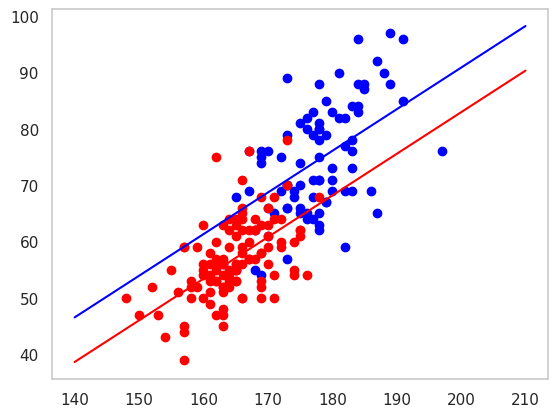

In [31]:
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'],
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'],
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')
plt.plot(heights, reta_masc, '-', c='blue')
plt.plot(heights, reta_fem, '-', c='red')
plt.show()

Prevendo o peso de uma mulher de 1,57 metros

In [33]:
lin_reg.predict([[0, 157]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([51.2017921])

Prevendo o peso de um homem de 1,73 metros

In [34]:
lin_reg.predict([[1, 173]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.93469186])

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
y_pred = lin_reg.predict(X)

In [37]:
mean_squared_error(y, y_pred)

49.26672880622364

In [38]:
a = lin_reg.predict([[0, 160]])
a

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53.41793623])

In [39]:
b = lin_reg.predict([[1, 160]])
b

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([61.33140063])

In [40]:
c = b-a
c

array([7.9134644])

In [41]:
lin_reg.predict([[0, 60]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-20.45353475])

<h4> Agora vamos analisar um exemplo mais complexo, envolvendo mais variáveis </h4>

Neste exercício vamos prever o valor mediano de uma casa na redondeza de Boston dados determinados atributos. Para isso utilizamos a base de dados 'boston.csv'

In [43]:
data = pd.read_csv('./boston.csv', sep=';', decimal=',')

Vamos analisar as 5 primeiras linhas dos nossos dados com o método head()

In [44]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.199997  4.0900    1  296   
1  0.02731   0.0   7.07     0  0.469  6.421  78.900002  4.9671    2  242   
2  0.02729   0.0   7.07     0  0.469  7.185  61.099998  4.9671    2  242   
3  0.03237   0.0   2.18     0  0.458  6.998  45.799999  6.0622    3  222   
4  0.06905   0.0   2.18     0  0.458  7.147  54.200001  6.0622    3  222   

          PT           B  LSTAT         MV  
0  15.300000  396.899994   4.98  24.000000  
1  17.799999  396.899994   9.14  21.600000  
2  17.799999  392.829987   4.03  34.700001  
3  18.700001  394.630005   2.94  33.400002  
4  18.700001  396.899994   5.33  36.200001

Nosso conjunto de dados possui 14 colunas:<br>
    <b>CRIM</b>: taxa de crimes per capta na cidade <br>
    <b>ZN</b>: proporção de terrenos residenciais zoneada para lotes acima de 25.000<br>
    <b>INDUS</b>: proporção de zonas de negócios não varejistas na cidade<br>
    <b>CHAS</b>: proximidade ao rio Carles 1 se próximo, 0 se não<br>
    <b>NOX</b>: concentração de oxido nitrico (ppm)<br>
    <b>RM</b>: número médio de cômodos por residência<br>
    <b>AGE</b>: proporção de unidades ocupadas pelo proprietário construídas antes de 1940<br>
    <b>DIS</b>: distância ponderada aos 5 centros financeiros de Boston<br>
    <b>RAD</b>: índice de acessibilidade às rodoviais <br>
    <b>TAX</b>: taxa de imposto predial de valor integral por USS 10.000 <br>
    <b>PT</b>: relação aluno-professor por cidade<br>
    <b>B</b>: 1000 (Bk − 0,63) 2 onde Bk é a proporção de negros por cidade<br>
    <b>LSTAT</b>: menor status da população <br>
    <b>MV</b>: Valor mediano de casas ocupadas pelo proprietário em USS 1000s

A fim de obtermos mais detalhes sobre os dados numéricos, podemos usar o método describe()

In [45]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976196  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX          PT           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674030   
std     28.148862    2.105710    8.707259  168.537116    2.164946   91.294863   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377487   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440002   
75%     94.074999    5.188425   24.000000  666.000000   20.200001  396.225006   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.899994   

            LSTAT          MV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200001  
75%     16.954999   25.000000  
max     37.970001   50.000000

Podemos visualizar a distribuição dos dados por meio de um histograma:

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PT'}>, <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MV'}>, <Axes: >, <Axes: >]], dtype=object)

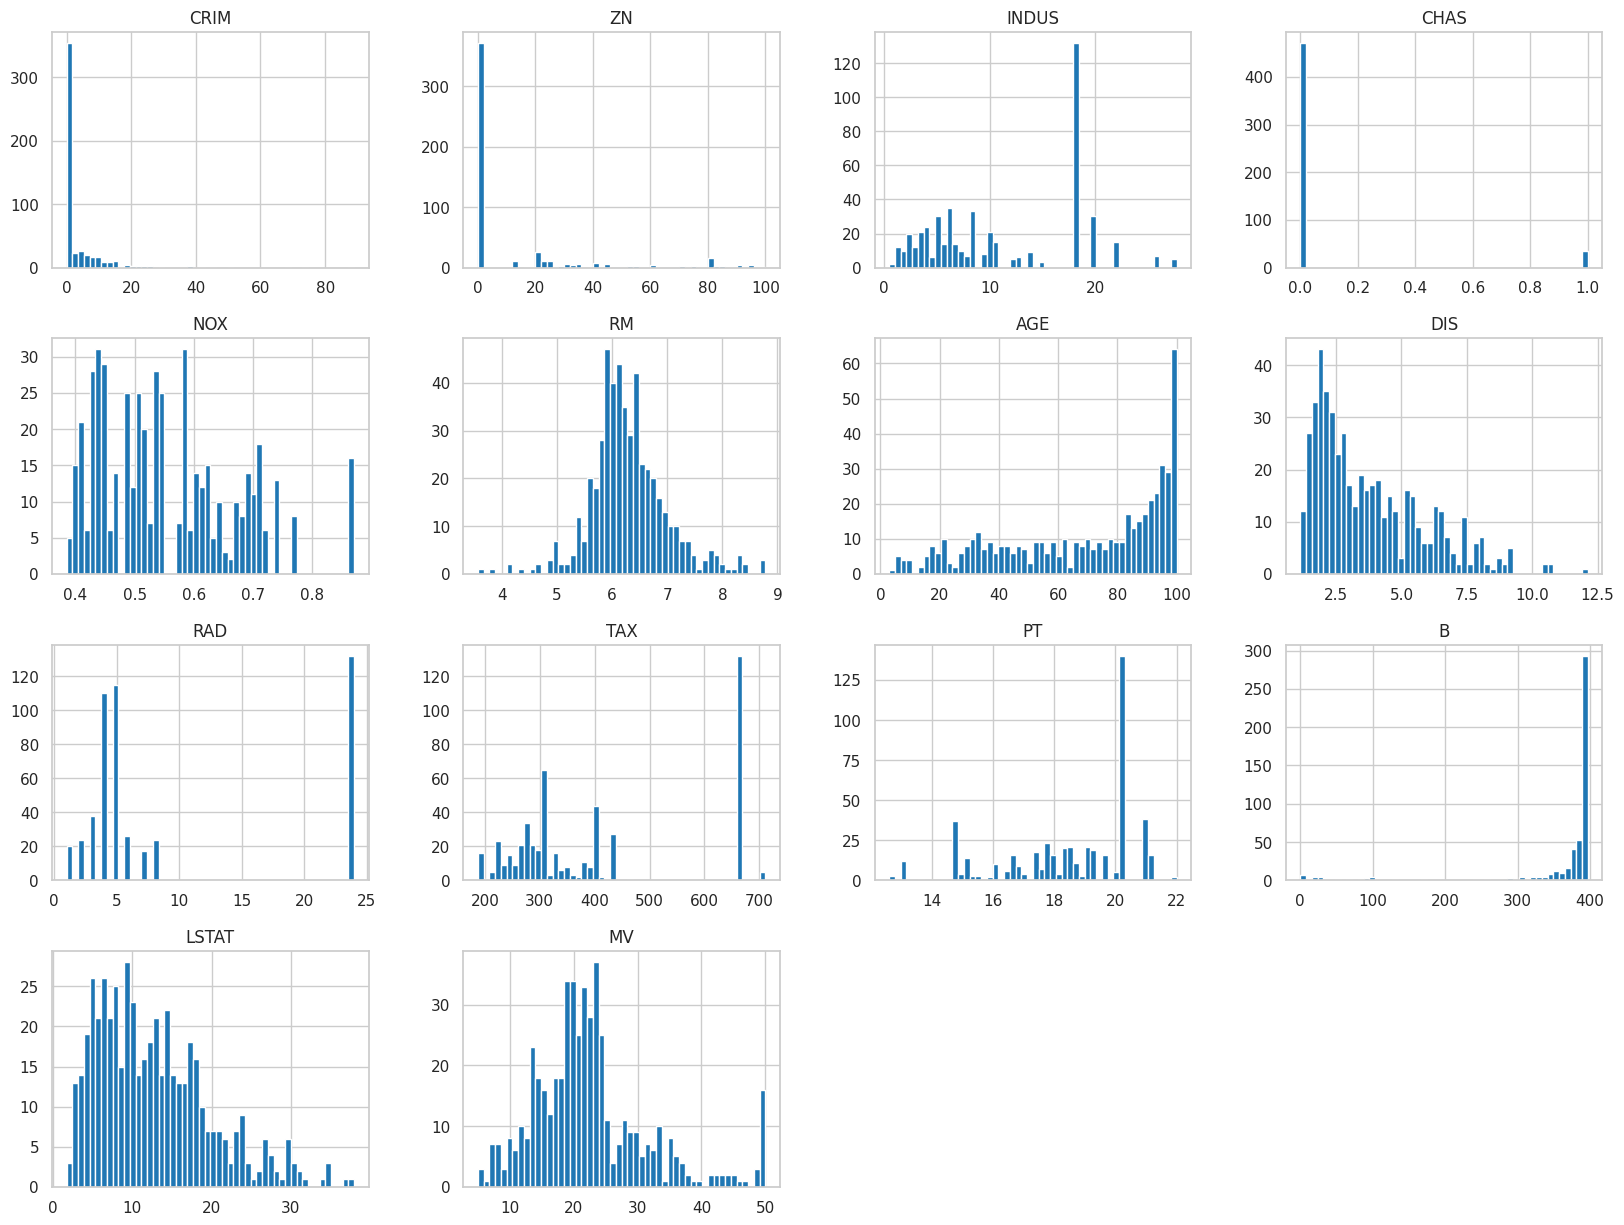

In [46]:
data.hist(bins=50, figsize=(20,15))

Agora que conhecemos os dados, podemos aplicar o método de regressão linear. Para isso especificamos qual será nossa varável dependente (y) e as variáveis independetes (X), ou atributos.

In [47]:
y = data['MV']
X = data.drop('MV', axis=1)

In [48]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

Agora que temos um modelo treinado, podemos prever o valor de um novo exemplo:

In [49]:
x_new = [[0.02731, 0.0, 7.07, 0, 0.469, 6.421,
          78.900002, 4.9671, 2, 242, 17.799999, 396.899994, 9.14]]

In [50]:
lin_reg.predict(x_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.02556341])

Também podemos prever uma lista de valores de uma única vez:

In [51]:
X_new = [[0.02731, 0.0, 7.07, 0, 0.469, 6.421, 78.900002, 4.9671, 2,
          242, 17.799999, 396.899994, 9.14],
         [0.67671, 0.8, 5.56, 0, 0.567, 3.132, 60.678976, 2.3465, 3,
          432,  9.546666, 342.435664, 3.23],
         [0.05641, 0.0, 1.04, 1, 0.232, 4.322, 67.564646, 1.5678, 5,
          567, 15.898006, 224.655678, 5.84]]

In [52]:
lin_reg.predict(X_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.02556341, 22.96398145, 27.65635662])

Também é possível visualizarmos os coeficientes da reta para cada atributo

In [53]:
lin_reg.coef_

array([-1.08011353e-01,  4.64204559e-02,  2.05586761e-02,  2.68673389e+00,
       -1.77666149e+01,  3.80986498e+00,  6.92223926e-04, -1.47556679e+00,
        3.06049515e-01, -1.23345932e-02, -9.52747256e-01,  9.31168341e-03,
       -5.24758397e-01])

e o valor do bias:

In [54]:
lin_reg.intercept_

36.45949145783379

Também podemos calcular o erro médio quadrado (MSE) do nosso modelo durante o treinamento

In [55]:
mean_squared_error(lin_reg.predict(X), y)

21.894831188831233

E seu eu quiser, ao invés de prever o peso, prever o sexo?

In [56]:
pesos.head()

sex  weight  height      M
0   M      77     182   True
1   F      58     161  False
2   F      53     161  False
3   M      68     177   True
4   F      59     157  False

In [57]:
#antes
#X = pesos[['M', 'height']]
#y = pesos.weight
#Agora
X1 = pesos[['height', 'weight']]
y1 = pesos.M
#y1 = pesos.sex

In [58]:
lin_reg1 = LinearRegression()
lin_reg1.fit(X1, y1)

LinearRegression()

In [59]:
lin_reg1.predict([[173, 80]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.74302842])

In [60]:
y_pred1 = lin_reg1.predict(X1)

In [61]:
mean_squared_error(y1, y_pred1)

0.09921070377288263

In [62]:
from sklearn.linear_model import LogisticRegression
reg_log = LogisticRegression(C=1)
reg_log.fit(X1, y1)

LogisticRegression(C=1)

In [63]:
reg_log.predict([[173, 80]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

In [64]:
y_pred2 = reg_log.predict(X1)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y1, y_pred2)

0.9076923076923077

In [67]:
accuracy_score(y1, y_pred2, normalize=False)

177

In [68]:
from sklearn.tree import DecisionTreeClassifier
arvore = DecisionTreeClassifier(criterion="entropy", max_depth=2)
arvore.fit(X1, y1)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [69]:
arvore.predict([[173, 80]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [70]:
y_pred3 = arvore.predict(X1)

In [71]:
accuracy_score(y1, y_pred3)

0.9076923076923077

In [72]:
accuracy_score(y1, y_pred3, normalize=False)

177

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1, y_pred3)
confusion_matrix

array([[99, 12],
       [ 6, 78]])

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y1, y_pred3))

              precision    recall  f1-score   support

       False       0.94      0.89      0.92       111
        True       0.87      0.93      0.90        84

    accuracy                           0.91       195
   macro avg       0.90      0.91      0.91       195
weighted avg       0.91      0.91      0.91       195



<h1 style="text-align:center"> Machine Learning Hands-On - Parte 2 </h1>

In [75]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

<h2 style="text-align:center; margin:40px"> Regressão Logística </h2>

![](img/logreg.png)

A <b>regressão logística</b> é um tipo de regressão utilizada no caso de resposta binária. O valor retornado pela regressão logística representa a probabilidade de ocorrer o evento de interesse.

Assim como na regressão linear, queremos encontrar os parâmetros $\beta$ que fazem o modelo melhor se ajustar aos dados. Partimos de uma função linear:

$$ f_{\beta}(x) = \sum_{i = 0}^{N} \beta_ix_i$$

E "encapsulamos" a função linear com uma função (chamada de <b>logística</b> ou <b>sigmoide</b>) que mapeia o espaço dos números reais em um espaço reduzido entre 0 e 1:

$$ \sigma(z) = \frac{1}{1 + e^{-z}}$$

<b>O novo modelo é dado por:</b>

$$ f_{\beta}(x) = \sigma(\sum_{i = 0}^{N} \beta_ix_i) = \frac{1}{1 + e^{-\sum_{i = 0}^{N} \beta_ix_i}}$$

Também substituímos a <b>função de erro</b> por uma função mais adequada para a variável resposta binária:

$$ L(x_i, y_i) = \color{red}{-y_i\log(f_{\beta}(x_i))}\color{blue}{-(1-y_i)\log(1-f_{\beta}(x_i))}$$

E mais uma vez aplicamos o método de gradiente descendente para encontrar o valor ótimo de $\beta$.

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn). Mas antes vamos dar uma olhada na base que usaremos com os próximos algoritmos de classificação

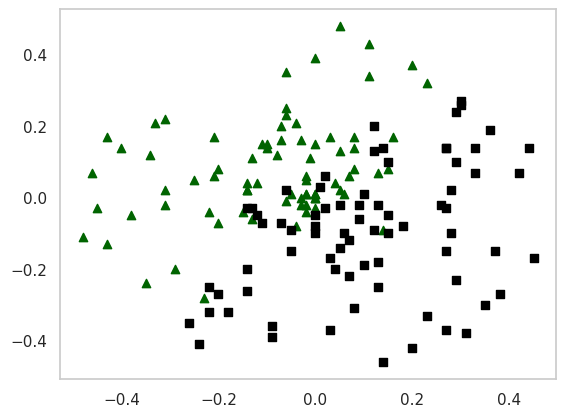

In [78]:
baseDados = pd.read_csv('./base_regressao_logistica.csv')
plt.scatter(baseDados.X1[baseDados.Y == 0], baseDados.X2[baseDados.Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[baseDados.Y == 1], baseDados.X2[baseDados.Y == 1], c = 'black', marker = ',')

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
LR = LogisticRegression(C = 1)
X = baseDados.loc[:, baseDados.columns != 'Y']
Y = baseDados.Y
LR.fit(X,Y)

LogisticRegression(C=1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


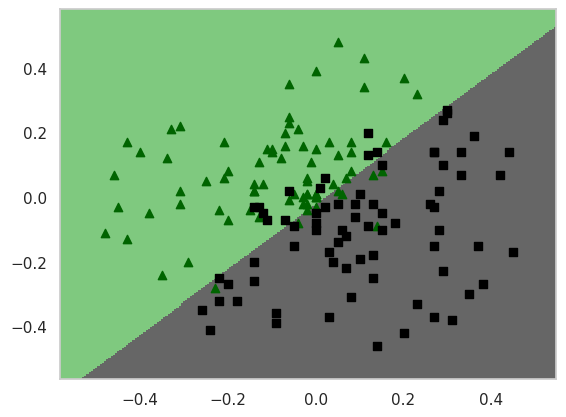

In [88]:
x_min, x_max = baseDados.X1.min() - .1, baseDados.X1.max() + .1
y_min, y_max = baseDados.X2.min() - .1, baseDados.X2.max() + .1
h = .005
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = LR.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = LR.predict(X)
plt.scatter(baseDados.X1[Y == 0], baseDados.X2[Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[Y == 1], baseDados.X2[Y == 1], c = 'black', marker = ',')

<h2 style="text-align:center; margin:40px"> Árvores de Decisão </h2>

<img src="img/titanic.png" style="width:75%"/>

O algoritmo de <b>árvores de decisão</b> busca construir árvores que separam o espaço de variáveis em <b>conjuntos disjuntos e homogêneos</b>.

<h3 style="text-align:center; margin:40px"> Como encontrar as melhores quebras? </h3>

<h3> Entropia: </h3>
A <b>entropia</b> mede a quantidade média de informação produzida por uma variável aleatória. No caso de uma <b>variável binária</b>, a fórmula para o cálculo da entropia é dada por:

$$ H(Y) = - P_0 \log_{2}{P_0} - P_1 \log_{2}{P_1}$$

<p style="text-align:center"> Onde $P_i$ significa $P(Y = i)$ </p>

![](img/entropia.png)

O algoritmo inicia em um nó <b>raiz com todas as observações</b>, e então, recursivamente, divide as observações de cada nó em <b>dois grupos</b>, de forma que a quebra escolhida <b>maximize o ganho de informação</b>:

$$ GI(X_p, X_e, X_d) = H(X_p) - \frac{|X_e|\,H(X_e)+|X_d|\,H(X_d)}{|X_e| + |X_d|} $$

<p style="text-align:center"> Onde: <br/>
$X_p$ é o conjunto de todas as observações no nó pai <br/>
$X_e$ é o conjunto de todas as observações no nó filho esquerdo <br/>
$X_d$ é o conjunto de todas as observações no nó filho direito <br/>
</p>

Para realizar uma predição, basta "descer" pela árvore até chegar em uma folha, e então a nova observação será marcada como sendo da <b>classe mais frequente na folha</b>.

<h3 style="text-align:center; margin:40px"> E se quisermos fazer regressão? </h3>

<b>A ideia é a mesma!</b>. No lugar da entropia utilizaremos a <b>variância</b>, e para fazer predições, basta "descer" pela árvore até chegar em uma folha, e o valor da nova observação será a <b>média dos valores na folha</b>.

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn). Iremos ver como a escolha dos parâmetros é <b>muito</b> importante para o resultado do algoritmo.

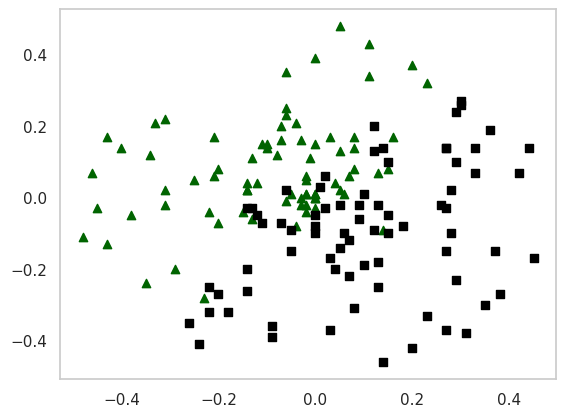

In [89]:
baseDados = pd.read_csv('./base_regressao_logistica.csv')
plt.scatter(baseDados.X1[baseDados.Y == 0], baseDados.X2[baseDados.Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[baseDados.Y == 1], baseDados.X2[baseDados.Y == 1], c = 'black', marker = ',')

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth=2)
X = baseDados.loc[:, baseDados.columns != 'Y']
Y = baseDados.Y
DT.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


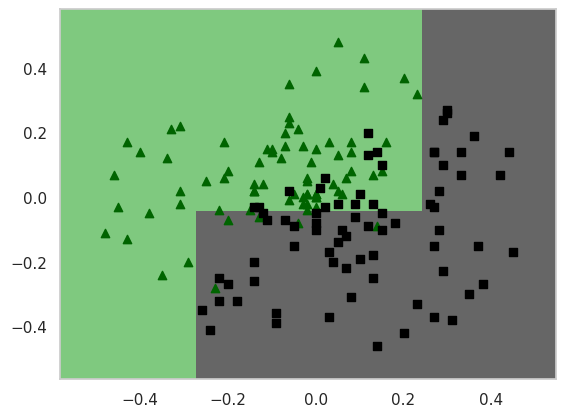

In [92]:
x_min, x_max = baseDados.X1.min() - .1, baseDados.X1.max() + .1
y_min, y_max = baseDados.X2.min() - .1, baseDados.X2.max() + .1
h = .005
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = DT.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = DT.predict(X)
plt.scatter(baseDados.X1[Y == 0], baseDados.X2[Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[Y == 1], baseDados.X2[Y == 1], c = 'black', marker = ',')

<h2 style="text-align:center; margin:40px"> KNN </h2>

![](img/knn.png)

O algoritmo <b>K Nearest Neighbors (KNN)</b> consiste em encontrar os <b>K</b> vizinhos mais próximos para determinar a classe (ou valor) de um elemento desconhecido.

<b>Classificação</b>:

<ul>
    <li>Votação simples</li>
    <li>Votação ponderada pela distância</li>
    <li>Etc...</li>
</ul>

<b>Regressão</b>:

<ul>
    <li>Média simples</li>
    <li>Média ponderada pela distância</li>
    <li>Etc...</li>
</ul>

<h4><font color = "red">Atenção:</font> O KNN é um algoritmo computacionalmente caro! </h4>

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn). Iremos ver como a escolha do <b>K</b> é importante para o resultado do algoritmo.

In [93]:
from sklearn.neighbors import KNeighborsClassifier

Primeiro lemos a base, visualizamos e preparamos as variáveis <i>xx</i> e <i>yy</i> que serão usadas para colorir a área que pertence à cada classe na visualização do modelo

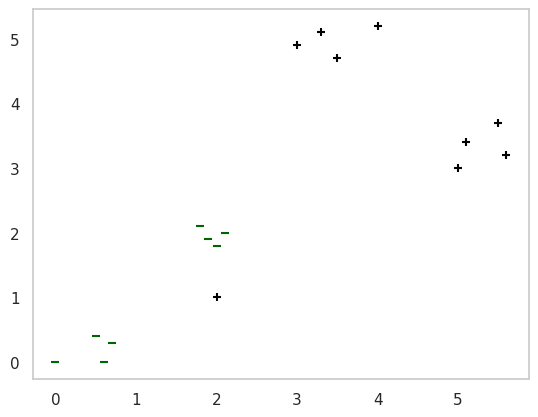

In [94]:
baseDados = pd.read_csv('./base_knn.csv')

h = .01
x_min, x_max = baseDados.X1.min() - 1, baseDados.X1.max() + 1
y_min, y_max = baseDados.X2.min() - 1, baseDados.X2.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.scatter(baseDados.X1[baseDados.Y == 0], baseDados.X2[baseDados.Y == 0], c = 'darkgreen', marker = '_')
plt.scatter(baseDados.X1[baseDados.Y == 1], baseDados.X2[baseDados.Y == 1], c = 'black', marker = '+')

Agora treinamos o algoritmo KNN e exibimos a função de decisão (modelo) gerada pelo algoritmo.

<b>Os círculos são novos pontos que desejamos classificar como negativo ou positivo.</b>

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


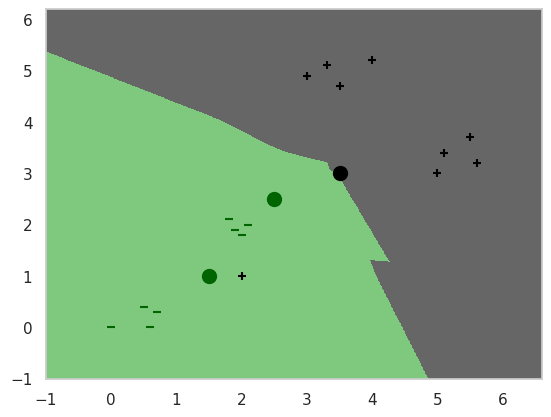

In [95]:
KNN = KNeighborsClassifier(n_neighbors = 2)
X = baseDados[['X1','X2']]
Y = baseDados.Y
KNN.fit(X,Y)

Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = KNN.predict(X)
plt.scatter(baseDados.X1[Y == 0], baseDados.X2[Y == 0], c = 'darkgreen', marker = '_')
plt.scatter(baseDados.X1[Y == 1], baseDados.X2[Y == 1], c = 'black', marker = '+')
plt.scatter([2.5],[2.5], s = 100, c = 'darkgreen' if KNN.predict([[2.5,2.5]]) == 0 else 'black')
plt.scatter([1.5],[1.0], s = 100, c = 'darkgreen' if KNN.predict([[1.5,1.0]]) == 0 else 'black')
plt.scatter([3.5],[3.0], s = 100, c = 'darkgreen' if KNN.predict([[3.5,3.0]]) == 0 else 'black')

<h2 style="text-align:center; margin:40px"> Naive Bayes </h2>

![](img/bayes.png)

O <b>Naive Bayes</b> é um classificador (e somente classificador) que calcula probabilidades baseado nas frequências relativas das observações, utilizando uma <b>simplificação do Teorema de Bayes</b>.

<h3 style="text-align:center; margin:40px"> Teorema de Bayes </h3>

$$ P(A\,|\,B) = \frac{P(B\,|\,A)P(A)}{P(B)} $$

<h3 style="text-align:center; margin:40px"> Aplicando em Machine Learning... </h3>

$$ P(Y=C\,|\,X) = \frac{P(X\,|\,Y=C)P(Y=C)}{P(X)} $$

<h3 style="text-align:center; margin:40px"> P(X) pode ser considerado constante!! </h3>

$$ P(Y=C\,|\,X) \approx P(X\,|\,Y=C)P(Y=C) $$

<h3 style="text-align:center; margin:40px"> Vamos assumir que cada $X_i$ é independente? </h3>

$$ P(Y=C\,|\,X) \approx P(Y=C) \prod_{i=1}^{N} P(X_i\,|\,Y=C)$$

<h3 style="text-align:center; margin:40px"> Exemplo prático - Jogar Tennis </h3>

![](img/tennis1.png)

<h3 style="text-align:center; margin:40px"> Aplicando a fórmula </h3>

$$ P(Decisão\,|\,X) \approx P(Decisão)*P(X\,|\,Decisão)$$

$$ P(Decisão\,|\,X) \approx P(Decisão)*P(Aspecto\,|\,Decisão)*P(Temperatura\,|\,Decisão)*P(Umidade\,|\,Decisão)*P(Vento\,|\,Decisão)$$

$$ P(Decisão = N) = \frac{5}{14} = 0.3571$$

$$ P(Decisão = S) = \frac{9}{14} = 0.6428$$

![](img/tennis2.png)

![](img/tennis3.png)

$$ P(Decisão=N\,|\,X)=0.36*0.60*0.20*0.80*0.60=0.0207 $$

$$ P(Decisão=S\,|\,X)=0.64*0.22*0.33*0.33*0.33=0.0050 $$

<h3 style="text-align:center; margin:40px"> Conclusão : Não jogar tennis! </h3>

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn).

In [96]:
from sklearn.naive_bayes import GaussianNB

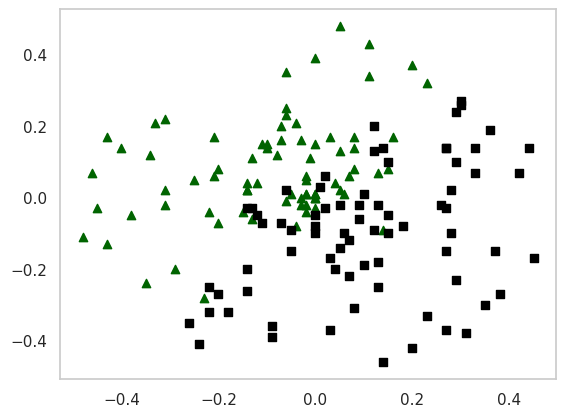

In [97]:
baseDados = pd.read_csv('./base_regressao_logistica.csv')
plt.scatter(baseDados.X1[baseDados.Y == 0], baseDados.X2[baseDados.Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[baseDados.Y == 1], baseDados.X2[baseDados.Y == 1], c = 'black', marker = ',')

In [98]:
NB = GaussianNB()
X = baseDados.loc[:, baseDados.columns != 'Y']
Y = baseDados.Y
NB.fit(X,Y)

GaussianNB()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


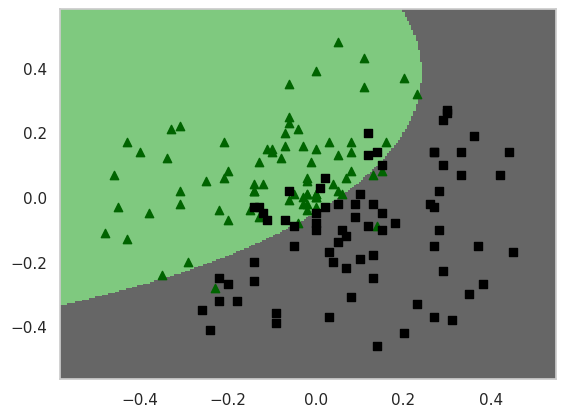

In [99]:
x_min, x_max = baseDados.X1.min() - .1, baseDados.X1.max() + .1
y_min, y_max = baseDados.X2.min() - .1, baseDados.X2.max() + .1
h = .005
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = NB.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = NB.predict(X)
plt.scatter(baseDados.X1[Y == 0], baseDados.X2[Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[Y == 1], baseDados.X2[Y == 1], c = 'black', marker = ',')

<h2 style="text-align:center; margin:40px"> Comparação de classificadores </h2>

In [133]:
#http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [135]:
h = .02  # step size in the mesh

In [136]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

In [137]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [138]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


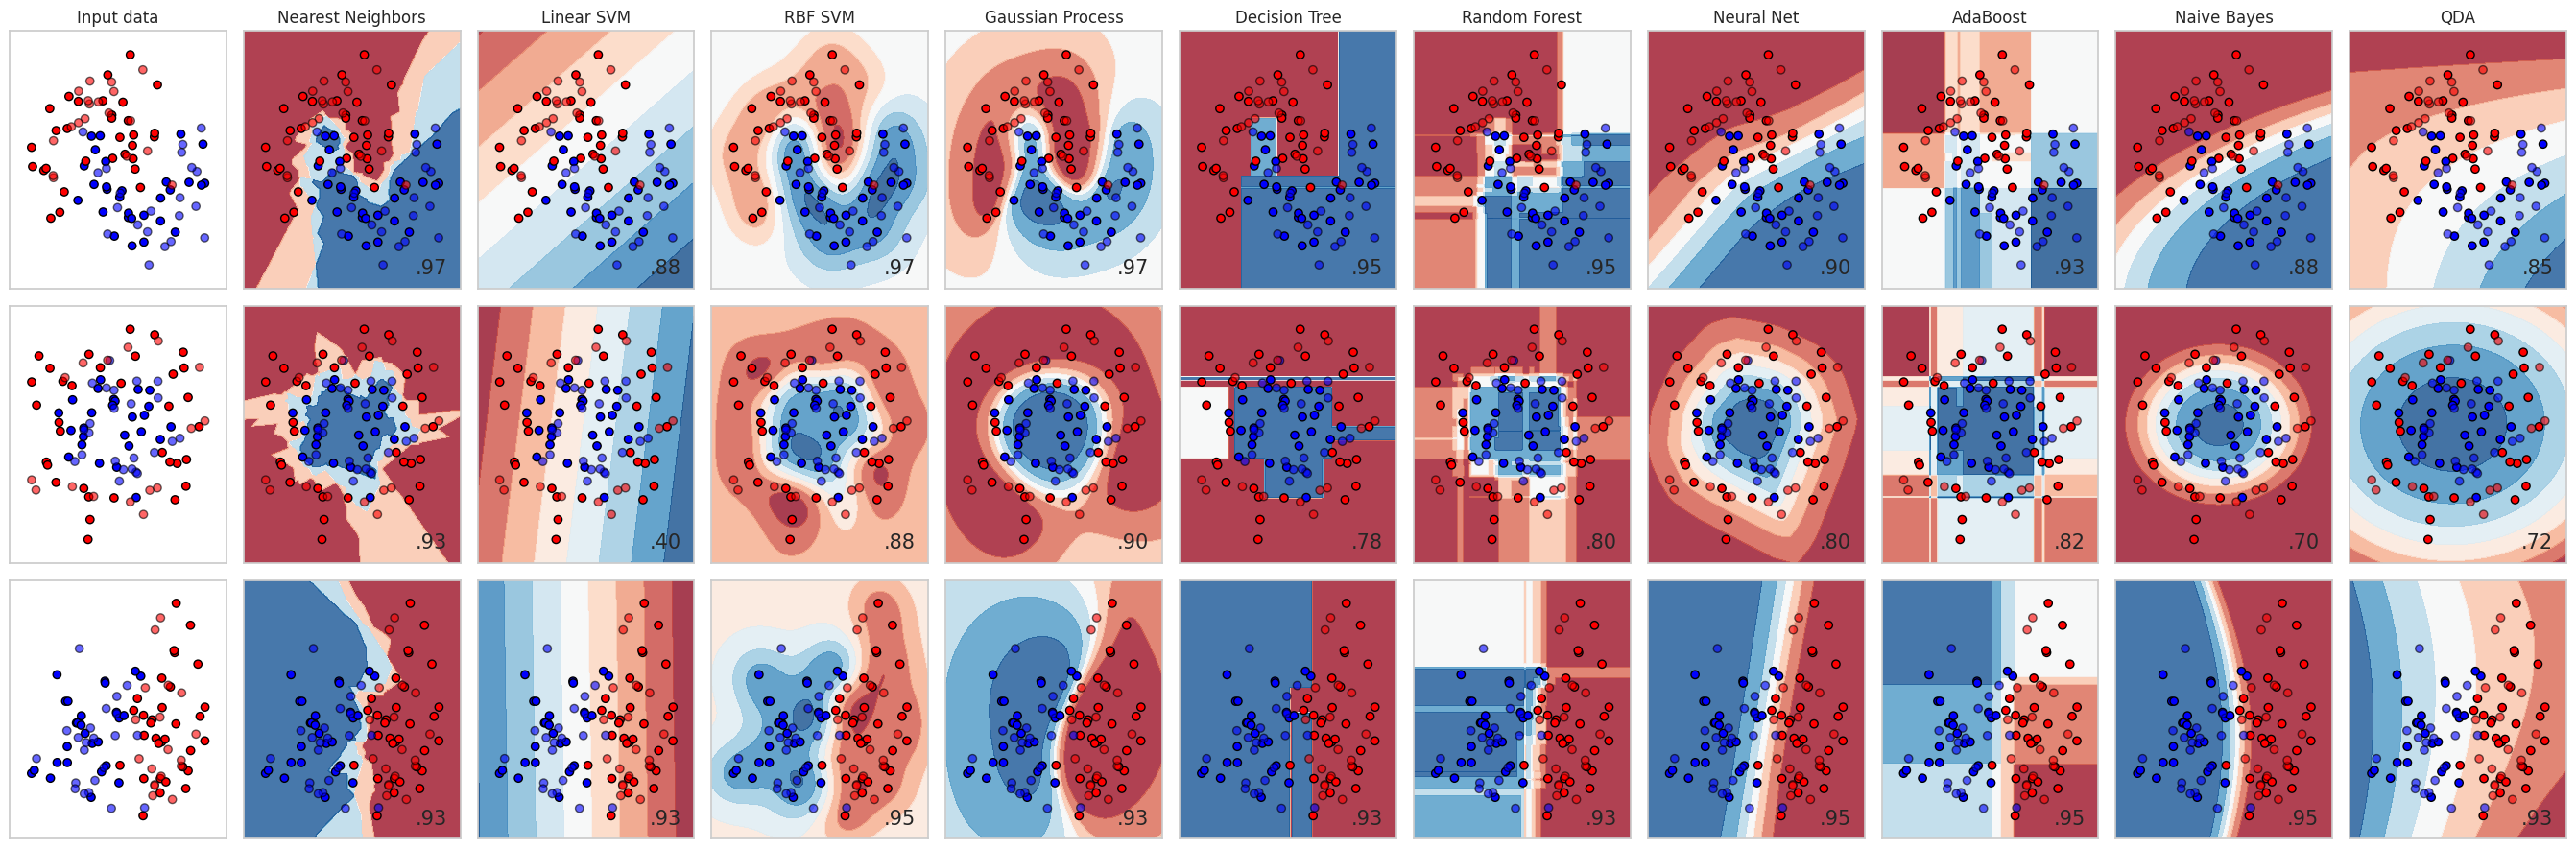

In [139]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

![](img/shap1.png)

<h1 style="text-align:center"> Machine Learning Hands-On Parte 3 </h1>

In [156]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

<h1 style="text-align:center"> Agrupamento </h1>

<h2 style="text-align:center; margin:40px"> Qual o melhor agrupamento para os personagens abaixo?</h2>

![](img/simpsons1.png)

<h2 style="text-align:center; margin:40px"> Existem diversos agrupamentos que fazem sentido... </h2>
<h3 style="text-align:center; margin:40px"> Grupo / Cluster é um conceito subjetivo </h3>

![](img/simpsons2.png)

<p style="margin-bottom:3cm;"></p>

![](img/simpsons4.png)
<p style="margin-bottom:1cm;"></p>
<b> Objetivo: </b> Encontrar grupos tais que <b>elementos similares são posicionados no mesmo grupo e elementos dissimilares são posicionados em grupos diferentes</b>.
<p style="margin-bottom:1cm;"></p>
<ul>
<li><b> Algoritmos Particionais: </b> Constroem uma partição dos dados ![](img/particionais.png)</li>
<p style="margin-bottom:1cm;"></p>
<li><b> Algoritmos Hierárquicos: </b> Constroem uma hierarquia de partições ![](img/hierarquicos.png)</li>
</ul>

<h2 style="margin-bottom:3cm;text-align:center"> Algoritmos Hierárquicos</h2>

<p style="margin-bottom:2cm;"> Em métodos de clustering hierárquicos, no início do algoritmo, cada objeto forma um singleton (cluster com um único objeto), e a cada iteração dois clusters são unidos. Desta forma, é possível recuperar qualquer partição intermediária com o valor de K desejado. </p>

![](img/fluxo_hierarquicos.png)

<p style="margin-bottom:2cm;"> A ordem na qual os clusters são agregados gera uma estrutura de árvore conhecida como <b>dendrograma</b> </p>

![](img/dendrograma.png)

<p style="margin-bottom:2cm;"> No dendrograma acima, os singletons formados pelos objetos <b>8</b> e <b>13</b> foram os primeiros a serem agregados. Cada corte horizontal em um dendrograma gera uma partição diferente, com uma quantidade de clusters (K) também diferente, variando entre 1 e o número de objetos. </p>

<h3> <font color = 'red'>Atenção:</font> Os algoritmos de clustering hierárquico são extremamente custosos! É necessário um uso de memória proporcional a $O(n^2)$ e uma quantidade de operações que pode variar de $O(n^2)$ a $O(n^3)$!

<h3> Scipy </h3>
Agora, vamos rodar os códigos abaixo que usam implementações disponíveis no pacote <i>scipy</i>.

In [157]:
from scipy.cluster import hierarchy

In [159]:
baseDados = pd.read_csv('./base_agrupamento_2.csv')
X = baseDados[['X','Y']]

Utilizando o algoritmo <i>single-link</i> na base de dados com clusters concêntricos, o dendrograma mostra claramente 2 clusters.

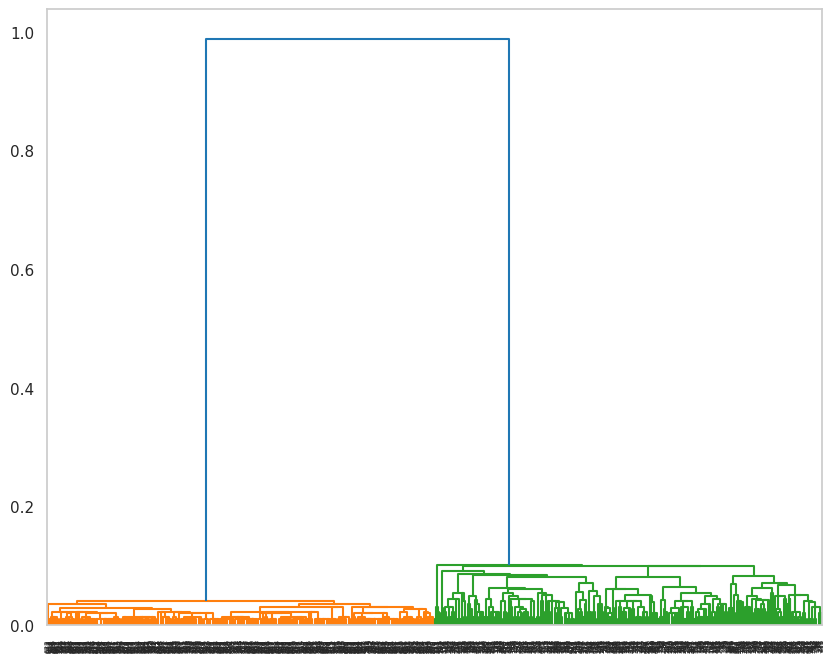

In [160]:
Z = hierarchy.linkage(X, method = 'single')
dendro = hierarchy.dendrogram(Z)
plt.show()

<b> O método de ligação pode afetar drasticamente os resultados do algoritmo </b>

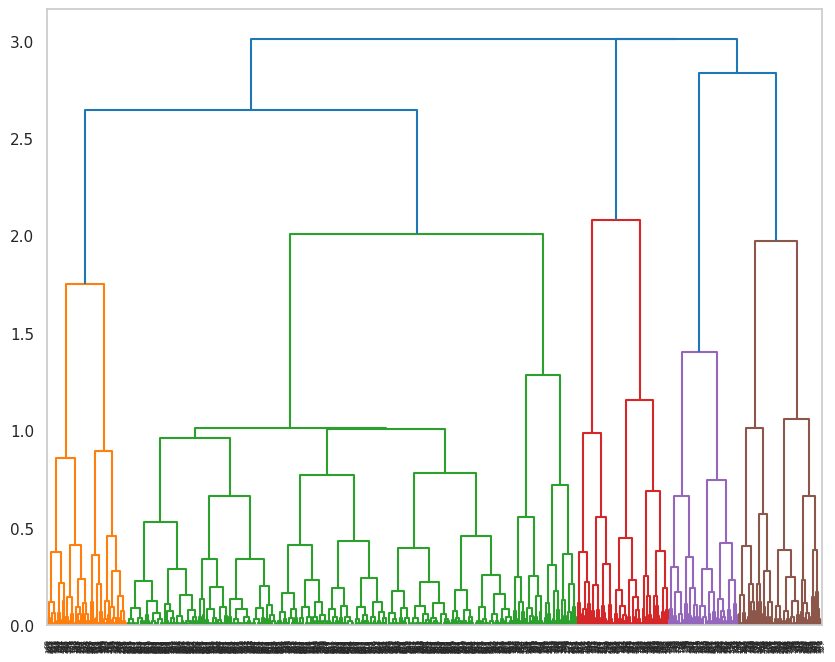

In [161]:
Z = hierarchy.linkage(X, method = 'complete')
dendro = hierarchy.dendrogram(Z)
plt.show()

Podemos recuperar uma partição com a função <i>fcluster</i>, passando como parâmetro o número de clusters desejado (K)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


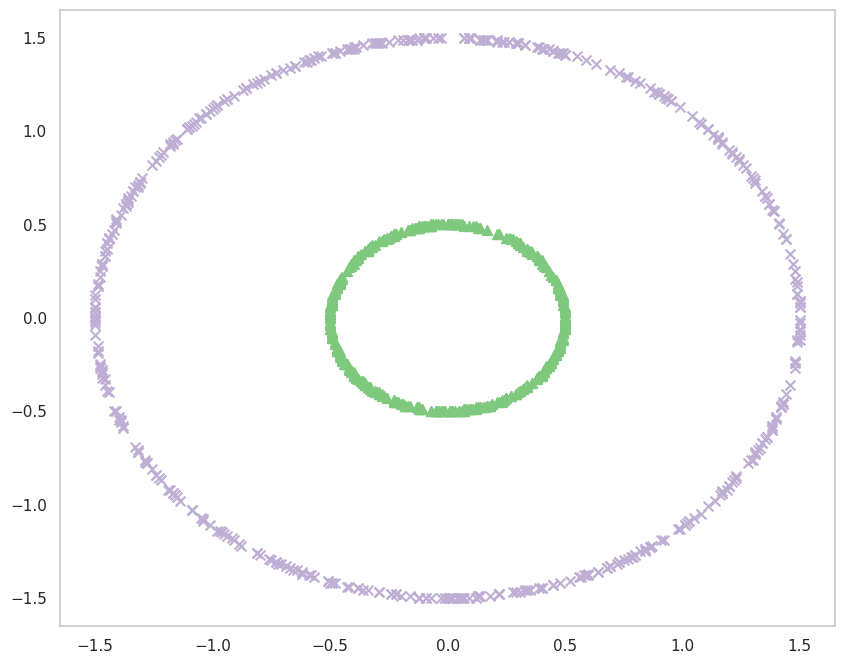

In [162]:
Z = hierarchy.linkage(X, method = 'single')
baseDados['hierarquico'] = hierarchy.fcluster(Z, 2, criterion = 'maxclust') - 1

markers = {0 : '^', 1 : 'x'}
for clu in baseDados.hierarquico.unique():
    plt.scatter(baseDados.X[baseDados.hierarquico == clu],
                baseDados.Y[baseDados.hierarquico == clu],
                s = 50,
                marker = markers[clu],
                c = plt.cm.Accent.colors[clu])

<h2 style="margin-bottom:3cm;text-align:center"> Algoritmos Particionais: K-Means</h2>

![](img/objetivo_agrupamento.png)
<h4 style="text-align:center;">Seja $K$ o número escolhido de clusters e $C_k$ o $k$-ésimo cluster, então queremos:</h4>
<h2 style="text-align:center;">$$\min{\sum_{k=1}^{K}\sum_{x \in C_k}||x - \bar{x}_k||^2}$$</h2>
<h4 style="text-align:center;">Onde $\bar{x}_k$ é o centroide do grupo $k$</h4>
<h2 style="text-align:center;">$$\bar{x}_k = \frac{1}{|C_k|}\sum_{x \in C_k} x$$</h2>
<h4 style="text-align:center;">A equação acima é geralmente chamada de <i>within cluster sum of squares</i></h4>

<p style="margin-bottom:1cm;"></p>
<h2 style="text-align:center;">Como minimizar?</h2>
<p style="margin-bottom:1cm;"></p>
<b>K-Means:</b> algoritmo de agrupamento <b>particional</b> cujo objetivo é particionar $n$ objetos em $k$ grupos onde cada objeto pertence ao grupo cujo centroide está mais próximo.

<b> Pseudo-código: </b>
```python
-- Particiona os objetos de entrada em K grupos
função K-Means(objetos, K):
    Inicialize K centroides {k1, k2, ..., kn} aleatoriamente
    Enquanto não houver convergência:
        Atribua cada objeto para o cluster cujo centroide está mais próximo
        Recalcule cada centroide como a média dos objetos do seu grupo
```
<h4 style="text-align:center;">Exemplo de iteração do K-Means</h4>
![](img/kmeans1.png)

<h3> Problema: </h3> Minimizar o <i>within cluster sum of squares</i> é um <b>problema NP-Completo</b>.
<ul>
    <li>Não existe algoritmo exato eficiente para resolver o problema! K-Means é apenas uma aproximação.</li>
    <li>O resultado pode variar significativamente dependendo da escolha dos centroides iniciais.</li>
    <li>O K-Means pode ficar "preso" em ótimos locais.</li>
</ul>

![](img/kmeans_bad.png)

<h3> Algumas possibilidades para contornar tais problemas: </h3>
<ul>
    <li><b>Multiplas execuções (inicializações aleatórias):</b> Funciona bem em muitos problemas porém pode demandar muitas execuções (especialmente com K alto).</li>
    <li><b>Agrupamento hierárquico:</b> Agrupa-se uma amostra dos dados para tomar os centros da partição com K grupos.</li>
    <li><b>K-Means++:</b> Selecionar o 1º centroide como um objeto aleatório, e sucessivamente, escolhe-se o próximo centroide aleatoriamente com probabilidade proporcional à distância entre este centroide e o centroide mais próximo que já foi selecionado.</li>
</ul>

![](img/kmeans_bad_2.png)

<h3> Cenário ideal para o funcionamento do K-Means: </h3>
<ul>
    <li>Clusters são (hiper)esféricos e bem separados</li>
    <li>Clusters têm variância aproximadamente igual</li>
    <li>Clusters têm quantidade de pontos semelhantes</li>
    <li>Dimensões (colunas) possuem a mesma variância</li>
</ul>

<h2 style="text-align:center; margin:40px"> Prática </h2>

Agora iremos executar o K-Means na prática. Primeiro, vamos dar uma olhada nas bases de dados:

In [163]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


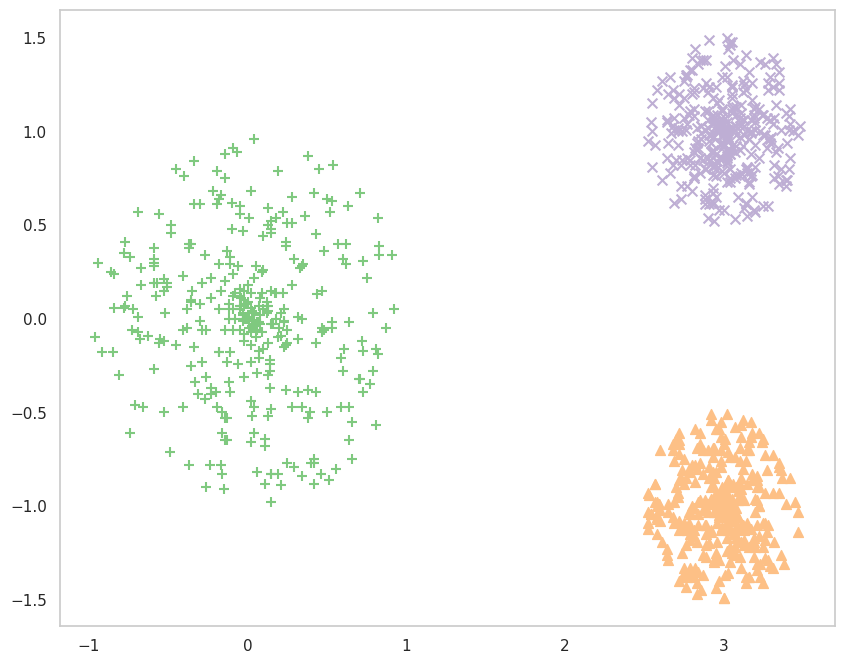

In [165]:
baseDados = pd.read_csv('./base_agrupamento_1.csv')

markers = {1 : '+', 2 : 'x', 3 : '^'}
for clu in baseDados.clu.unique():
    plt.scatter(baseDados.X[baseDados.clu == clu],
                baseDados.Y[baseDados.clu == clu],
                s = 50,
                marker = markers[clu],
                c = plt.cm.Accent.colors[clu - 1])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


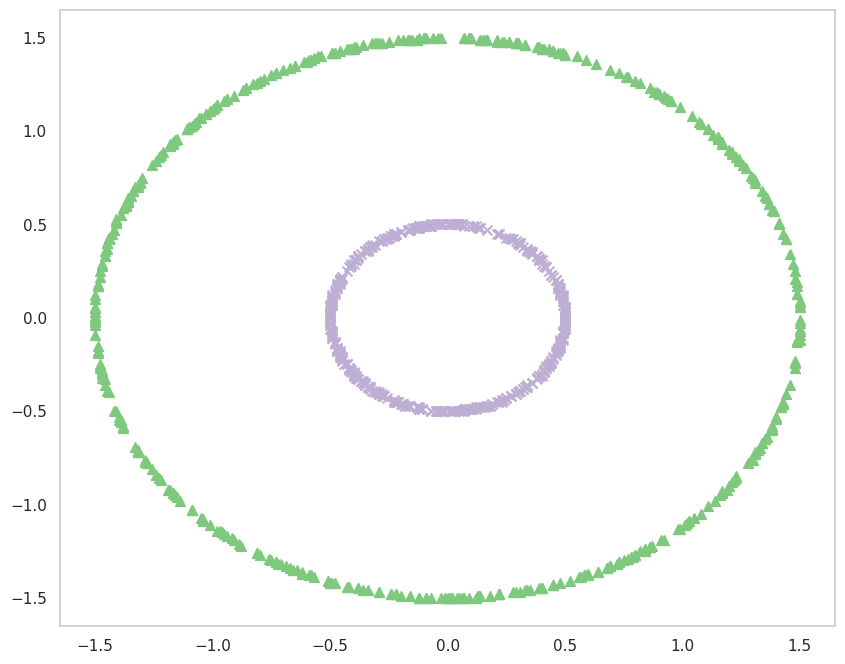

In [167]:
baseDados = pd.read_csv('./base_agrupamento_2.csv')

markers = {1 : '^', 2 : 'x'}
for clu in baseDados.clu.unique():
    plt.scatter(baseDados.X[baseDados.clu == clu],
                baseDados.Y[baseDados.clu == clu],
                s = 50,
                marker = markers[clu],
                c = plt.cm.Accent.colors[clu - 1])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


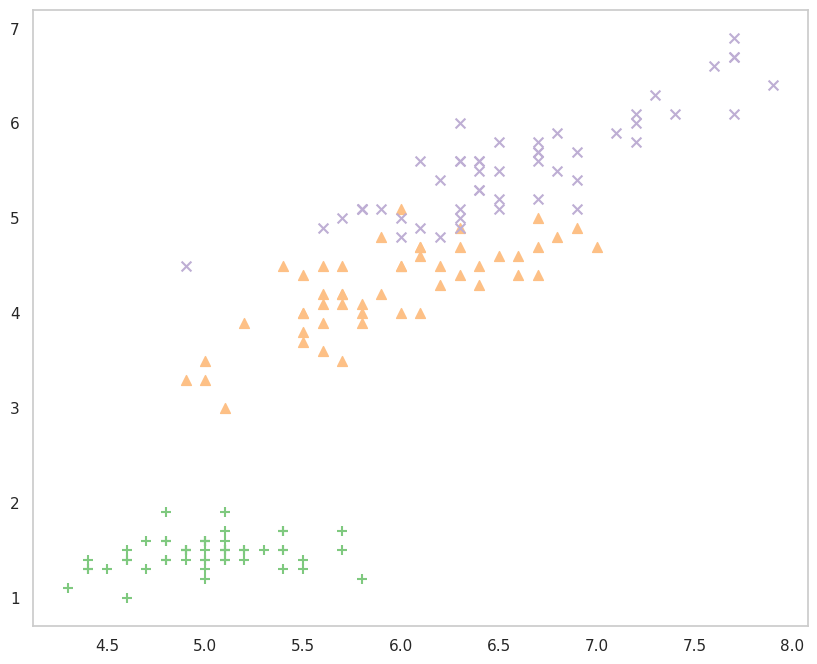

In [168]:
baseDados = pd.read_csv('./iris.csv')

markers = {'setosa' : '+', 'virginica' : 'x', 'versicolor' : '^'}
colors = {'setosa' : 0, 'virginica' : 1, 'versicolor' : 2}
for clu in baseDados.species.unique():
    plt.scatter(baseDados['sepal length (cm)'][baseDados.species == clu],
                baseDados['petal length (cm)'][baseDados.species == clu],
                s = 50,
                marker = markers[clu],
                c = plt.cm.Accent.colors[colors[clu]])

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn). Iremos rodar o código passo a passo para podermos visualizar os centroides em cada iteração.

In [169]:
from sklearn.cluster import KMeans

Primeiro lemos a base, inicializamos centroides aleatórios e preparamos as variáveis <i>xx</i> e <i>yy</i> que serão usadas para colorir a área que pertence à cada cluster na visualização

In [170]:
np.random.seed(42)
baseDados = pd.read_csv('./base_agrupamento_1.csv')
X = baseDados[['X','Y']]
centers = np.array([[np.random.uniform(baseDados.X.min(), baseDados.X.max()),
            np.random.uniform(baseDados.Y.min(), baseDados.Y.max())] for i in range(3)])

h = .005
x_min, x_max = baseDados.X.min() - 1, baseDados.X.max() + 1
y_min, y_max = baseDados.Y.min() - 1, baseDados.Y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Agora treinamos o algoritmo K-Means e exibimos a posição dos centroides a cada iteração

Se executarmos o algoritmo várias vezes, iremos perceber que os <b>resultados variam</b>, e eventualmente o algoritmo cai em um <b>ótimo local</b>!

X does not have valid feature names, but KMeans was fitted with feature names


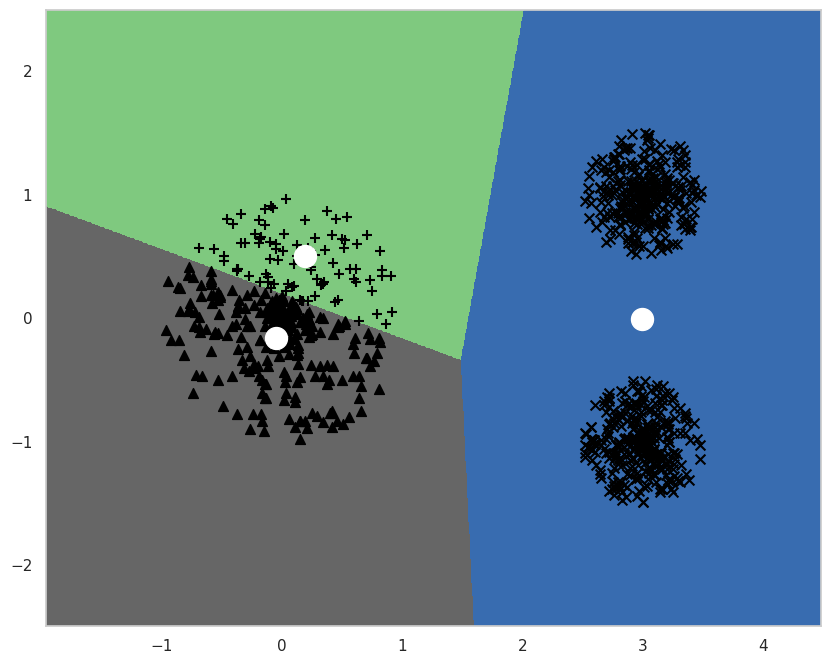

X does not have valid feature names, but KMeans was fitted with feature names


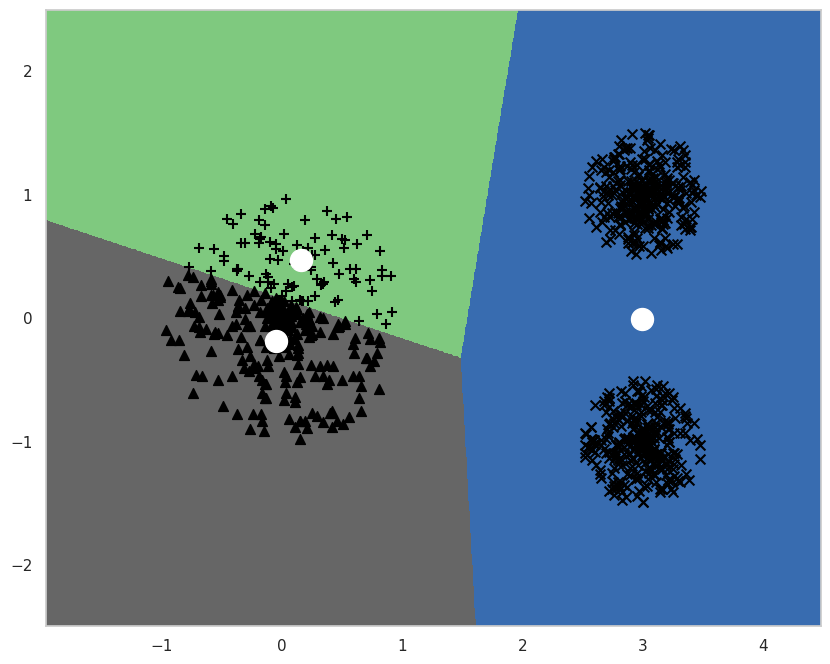

X does not have valid feature names, but KMeans was fitted with feature names


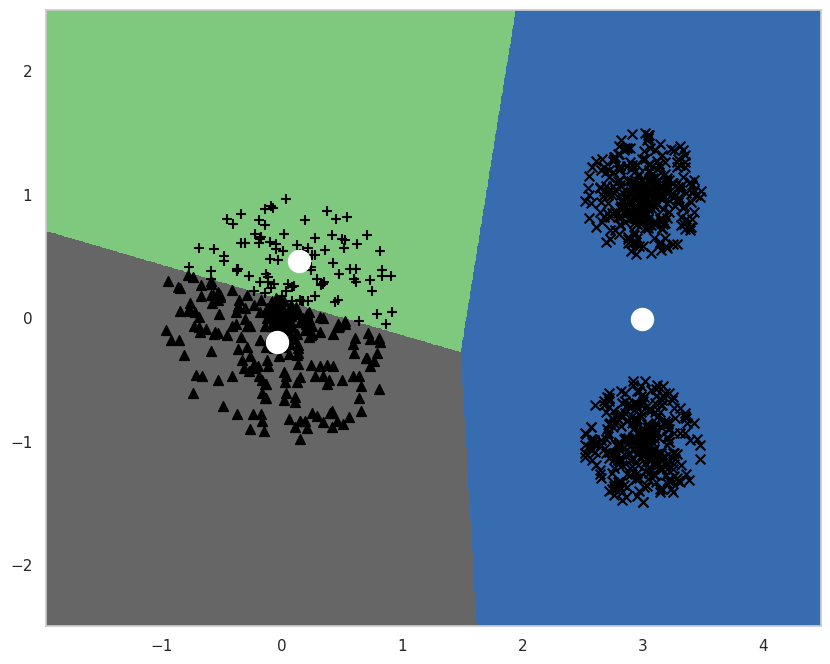

X does not have valid feature names, but KMeans was fitted with feature names


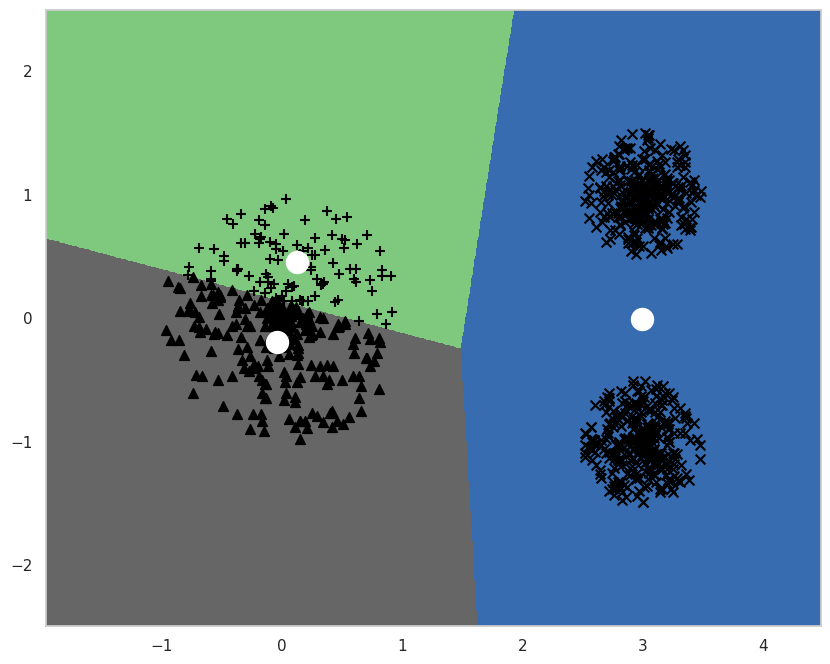

X does not have valid feature names, but KMeans was fitted with feature names


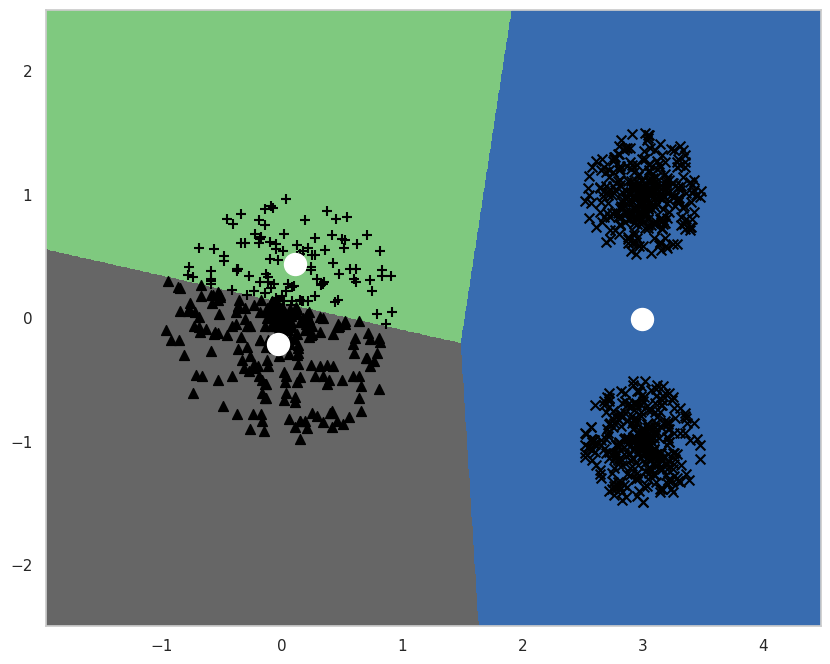

X does not have valid feature names, but KMeans was fitted with feature names


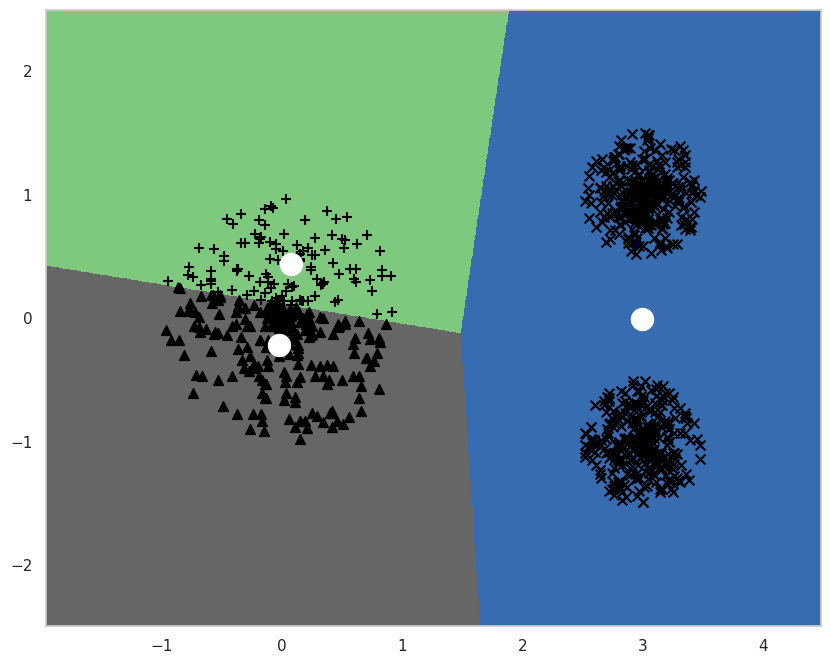

X does not have valid feature names, but KMeans was fitted with feature names


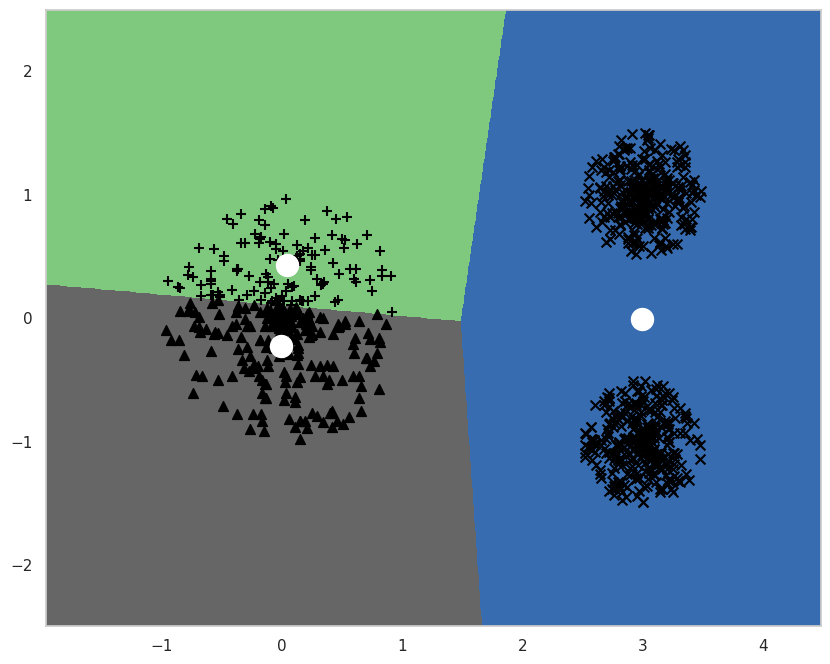

X does not have valid feature names, but KMeans was fitted with feature names


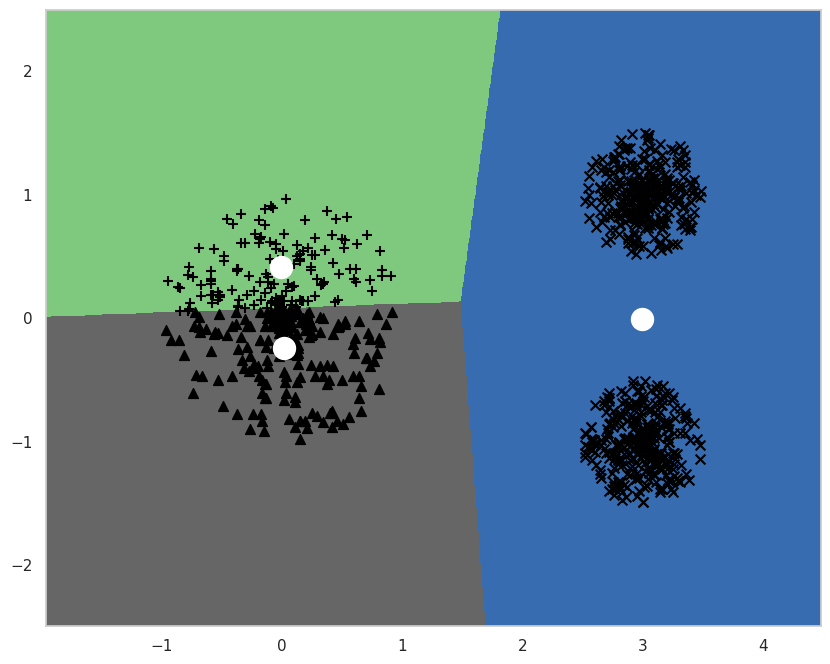

X does not have valid feature names, but KMeans was fitted with feature names


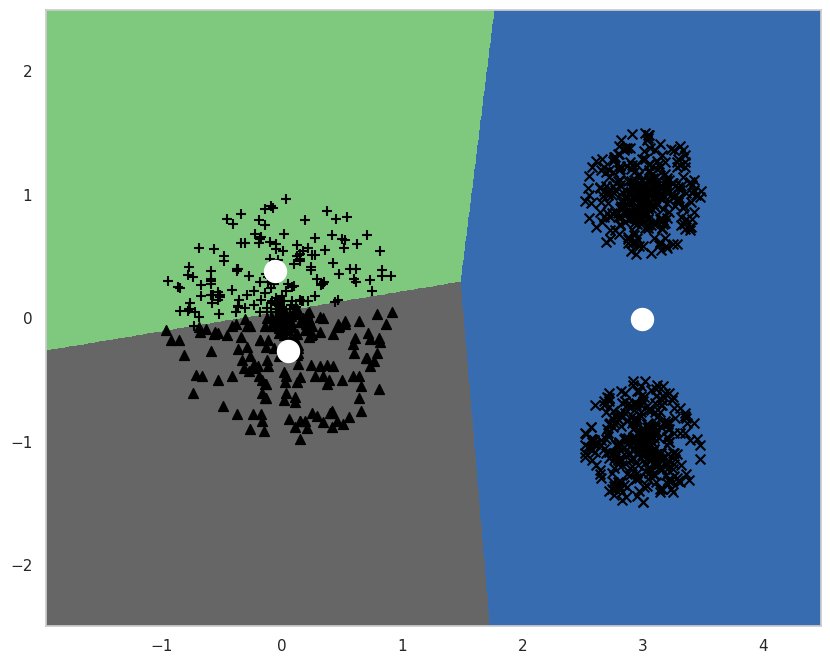

X does not have valid feature names, but KMeans was fitted with feature names


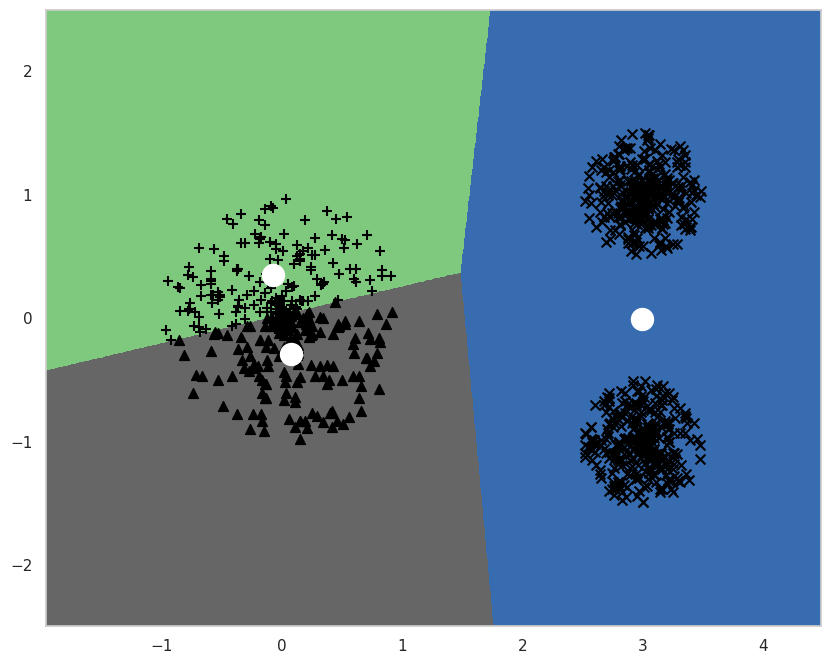

In [171]:
for _ in range(10):
    km = KMeans(n_clusters = 3, n_init = 1, init = centers, max_iter=1)
    baseDados['kmeans'] = km.fit_predict(X)

    # Nesta parte imprimimos a area colorida no fundo
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Accent,
               aspect='auto', origin='lower')

    # Nesta parte imprimimos os pontos
    markers = {0 : '+', 1 : 'x', 2 : '^'}
    for clu in baseDados.kmeans.unique():
        plt.scatter(baseDados.X[baseDados.kmeans == clu],
                    baseDados.Y[baseDados.kmeans == clu],
                    s = 50,
                    marker = markers[clu],
                    c = 'black')

    for centroide in km.cluster_centers_:
        plt.scatter(centroide[0], centroide[1], s = 250, c = 'white')
    centers = km.cluster_centers_
    plt.show()

Executando com o <b>k-means++</b> e mais de uma inicialização, garantimos o melhor agrupamento para este conjunto de dados

X does not have valid feature names, but KMeans was fitted with feature names


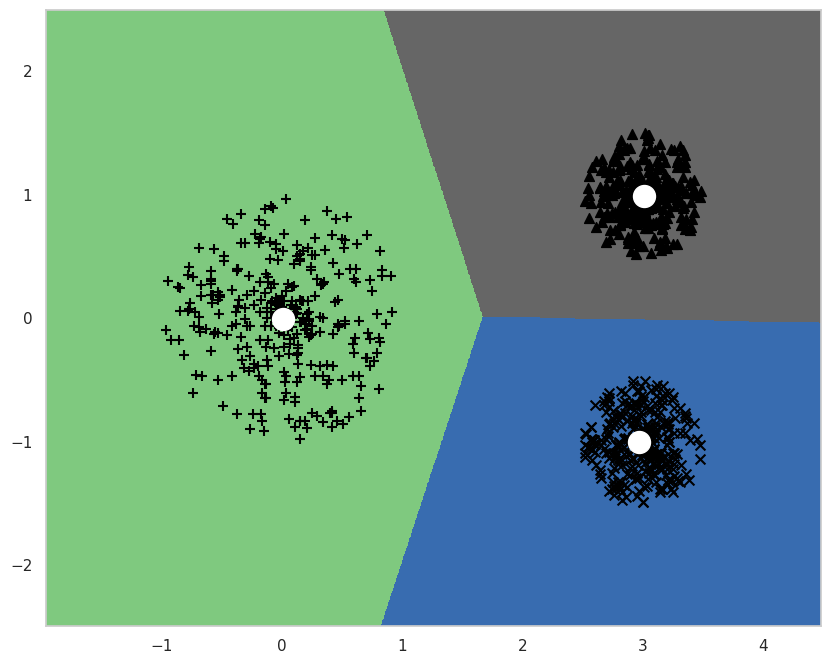

In [172]:
km = KMeans(n_clusters = 3, n_init = 3, init = 'k-means++', max_iter=300)
baseDados['kmeans'] = km.fit_predict(X)

# Nesta parte imprimimos a area colorida no fundo
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Accent,
           aspect='auto', origin='lower')

# Nesta parte imprimimos os pontos
markers = {0 : '+', 1 : 'x', 2 : '^'}
for clu in baseDados.kmeans.unique():
    plt.scatter(baseDados.X[baseDados.kmeans == clu],
                baseDados.Y[baseDados.kmeans == clu],
                s = 50,
                marker = markers[clu],
                c = 'black')

for centroide in km.cluster_centers_:
    plt.scatter(centroide[0], centroide[1], s = 250, c = 'white')
centers = km.cluster_centers_
plt.show()

Na segunda base de dados, o KMeans não conseguirá agrupar os dados da forma que desejamos, não importa como ele for ajustado

In [173]:
baseDados = pd.read_csv('./base_agrupamento_2.csv')
X = baseDados[['X','Y']]

h = .005
x_min, x_max = baseDados.X.min() - 1, baseDados.X.max() + 1
y_min, y_max = baseDados.Y.min() - 1, baseDados.Y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X does not have valid feature names, but KMeans was fitted with feature names


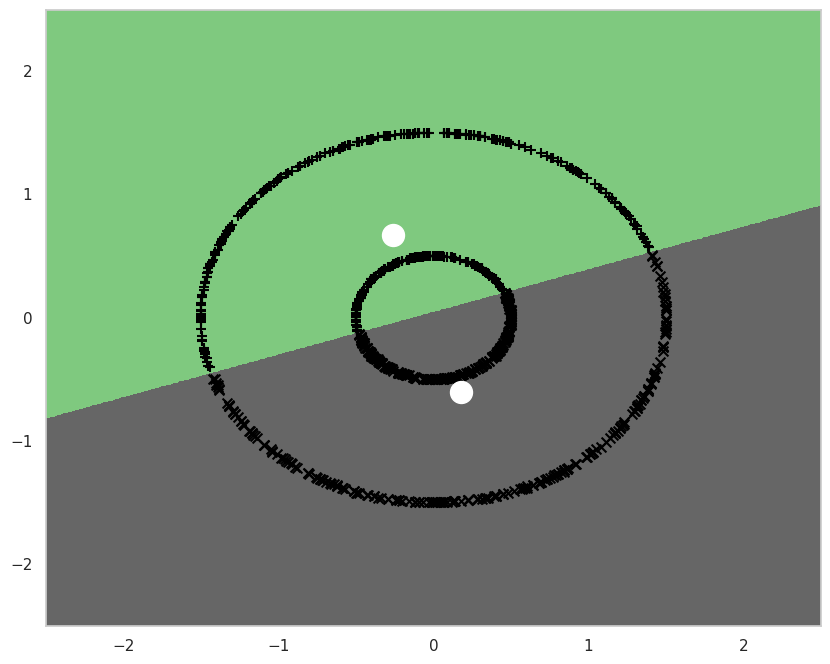

In [174]:
km = KMeans(n_clusters = 2, n_init = 3, init = 'k-means++', max_iter=300)
baseDados['kmeans'] = km.fit_predict(X)

# Nesta parte imprimimos a area colorida no fundo
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Accent,
           aspect='auto', origin='lower')

# Nesta parte imprimimos os pontos
markers = {0 : '+', 1 : 'x', 2 : '^'}
for clu in baseDados.kmeans.unique():
    plt.scatter(baseDados.X[baseDados.kmeans == clu],
                baseDados.Y[baseDados.kmeans == clu],
                s = 50,
                marker = markers[clu],
                c = 'black')

for centroide in km.cluster_centers_:
    plt.scatter(centroide[0], centroide[1], s = 250, c = 'white')
centers = km.cluster_centers_
plt.show()

Vamos entender melhor como utilizar o algoritmo na prática

Primeiro precisamos criar o objeto <b>KMeans</b> com os seguintes parâmetros:
<ul>
    <li><b>n_clusters:</b> Número de clusters desejados (K)</li>
    <li><b>n_init:</b> Número de inicializações aleatórias. O padrão é 10.</li>
    <li><b>init:</b> Método de inicialização. O padrão é 'k-means++'. Também podemos optar por 'random' ou passar uma lista de centroides.</li>
    <li><b>max_iter:</b> Número máximo de iterações. O padrão é 300. Geralmente o algoritmo converge bem antes disso.</li>
</ul>

In [175]:
km = KMeans(n_clusters = 3, n_init = 10, init = 'k-means++', max_iter = 300)

Então devemos <b>treinar o algoritmo</b>, ou seja, calibrar os centroides, utilizando a função <b>fit</b>

In [176]:
km.fit(X)

KMeans(n_clusters=3, n_init=10)

Finalmente podemos <b>atribuir um cluster</b> para cada ponto com a função <b>predict</b>

In [177]:
baseDados['kmeans'] = km.predict(X)
baseDados.head()

X     Y  clu  kmeans
0 -1.00  1.12    1       2
1 -0.22 -1.48    1       0
2 -0.98 -1.14    1       2
3  0.48  1.42    1       1
4 -0.51 -1.41    1       0

Caso precisemos dos <b>centroides</b>, podemos resgatá-los com o atributo <b>cluster\_centers\_</b>

In [178]:
km.cluster_centers_

array([[ 0.46050992, -0.69254958],
       [ 0.24178914,  0.82734824],
       [-0.80622754, -0.0642515 ]])

In [179]:
# Centroide do cluster k
k = 0
km.cluster_centers_[k, :]

array([ 0.46050992, -0.69254958])

In [180]:
%matplotlib inline


# Demo of DBSCAN clustering algorithm


Finds core samples of high density and expands clusters from them.




Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


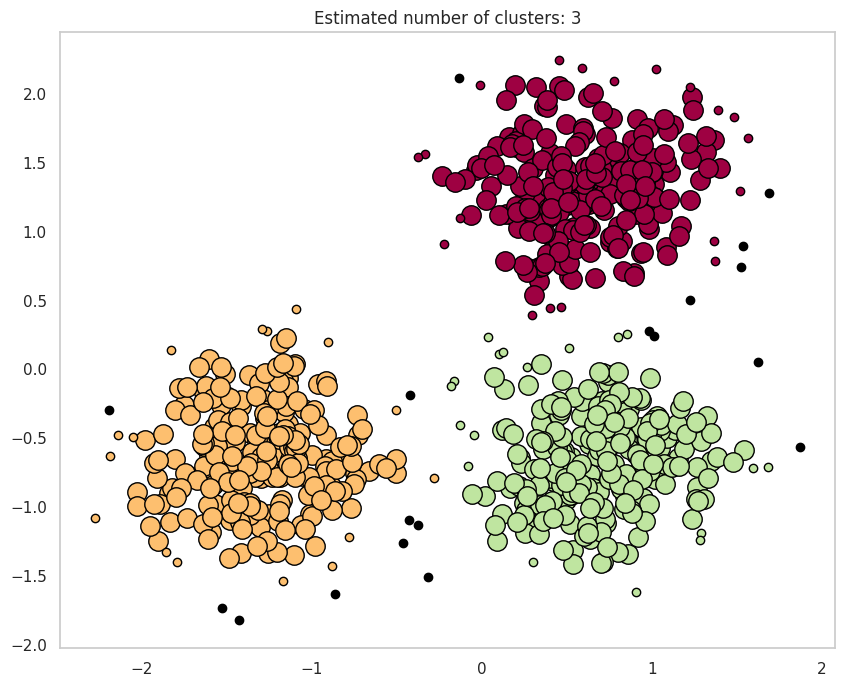

In [182]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


# Comparing different clustering algorithms on toy datasets


This example shows characteristics of different
clustering algorithms on datasets that are "interesting"
but still in 2D. With the exception of the last dataset,
the parameters of each of these dataset-algorithm pairs
has been tuned to produce good clustering results. Some
algorithms are more sensitive to parameter values than
others.

The last dataset is an example of a 'null' situation for
clustering: the data is homogeneous, and there is no good
clustering. For this example, the null dataset uses the
same parameters as the dataset in the row above it, which
represents a mismatch in the parameter values and the
data structure.

While these examples give some intuition about the
algorithms, this intuition might not apply to very high
dimensional data.



Automatically created module for IPython interactive environment


The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metr

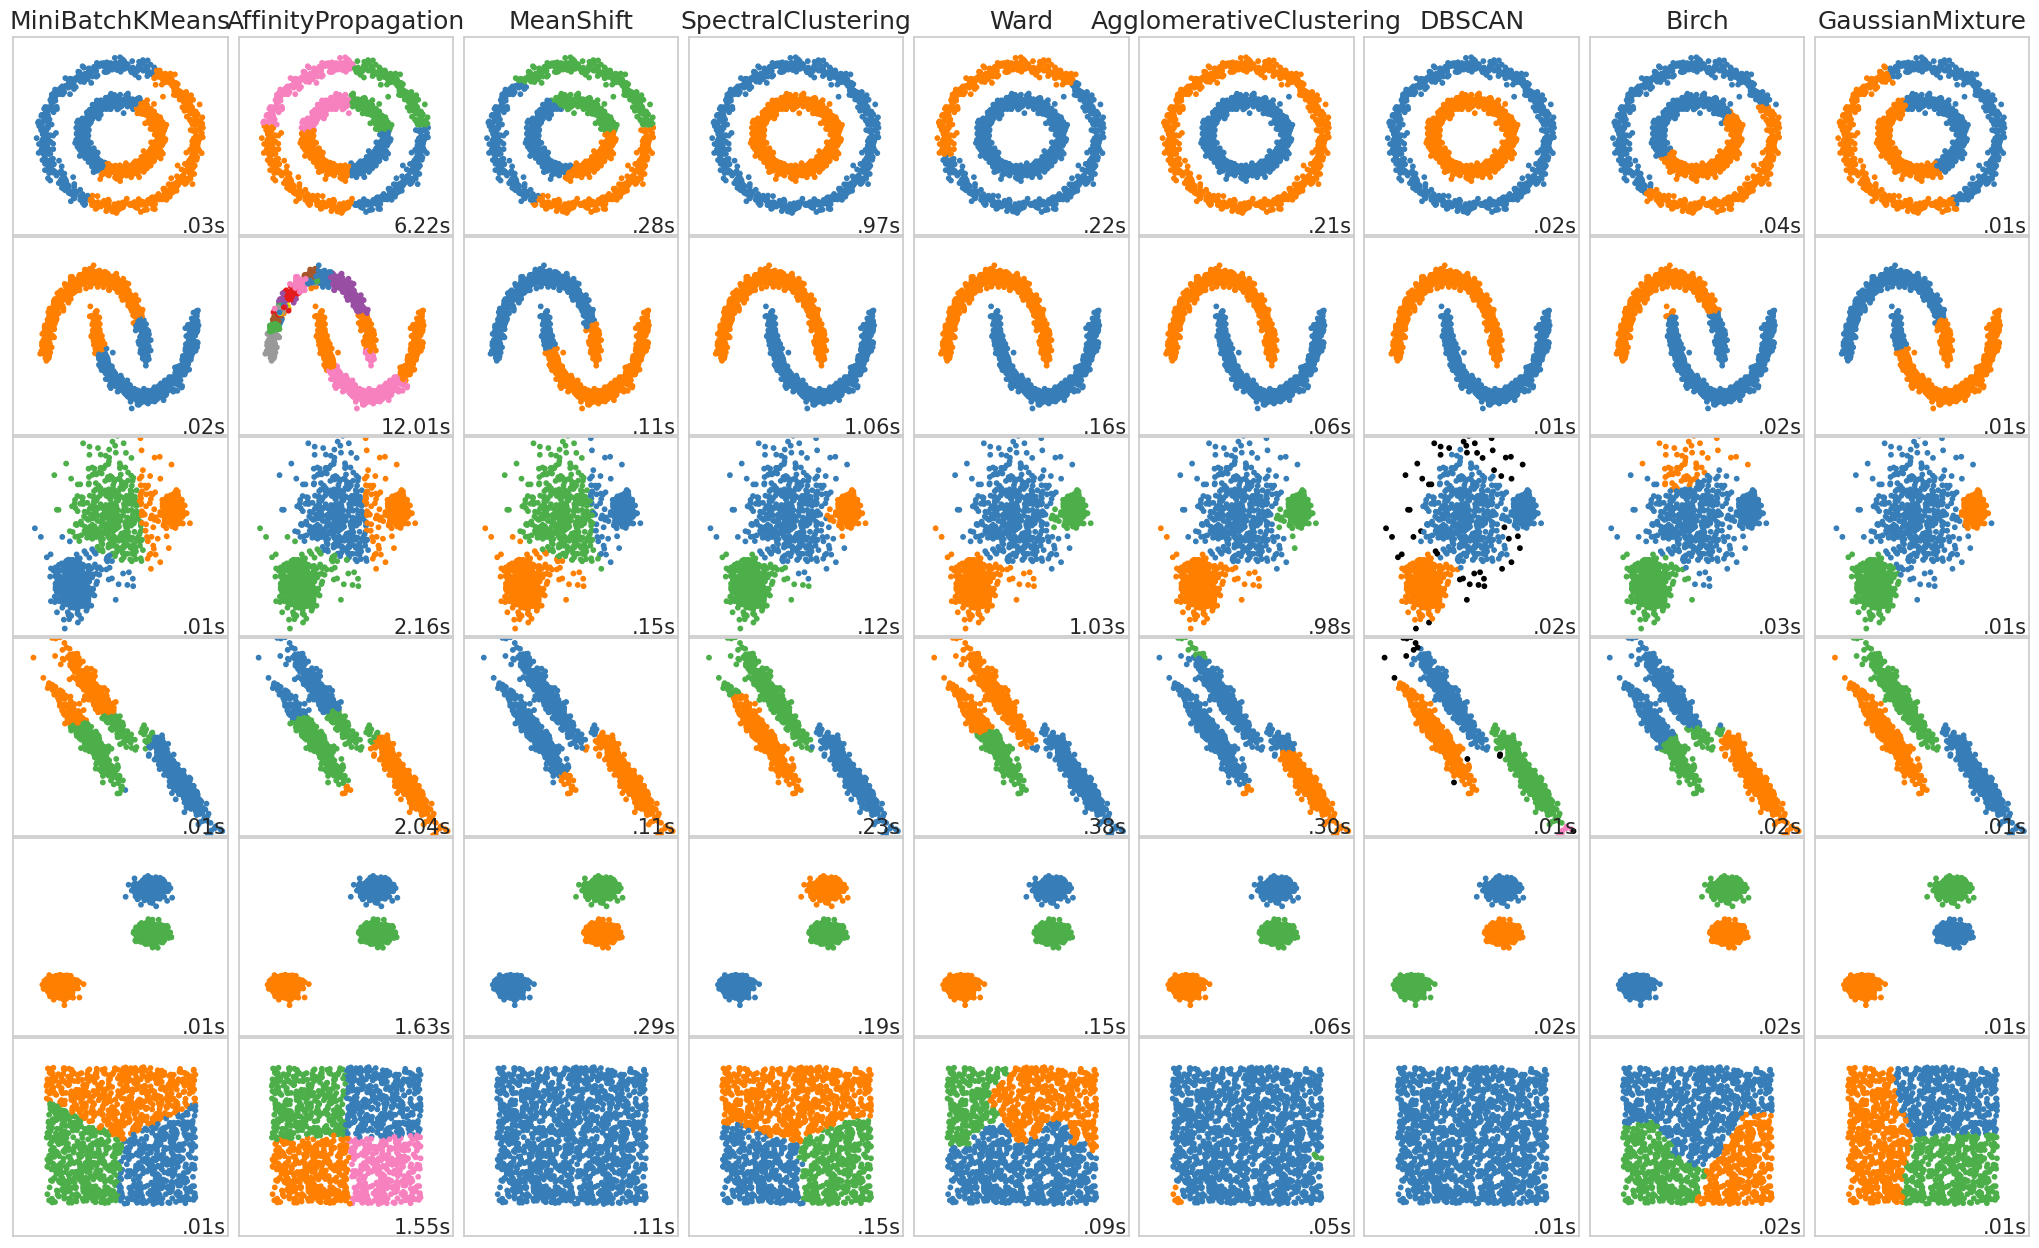

In [184]:
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt


from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    #optics = cluster.OPTICS(min_samples=params['min_samples'],
    #                        xi=params['xi'],
    #                        min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        #('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int_)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

<a id="1"></a>
## 1. What does KMeans do?

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

* The centroids of the K clusters, which can be used to label new data
* Labels for the training data (each data point is assigned to a single cluster)

![](https://imgur.com/a/wVDJPuZ)

![](https://i.imgur.com/rwkQNbv.png)

<a id="2"></a>
## 2. Applications
The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the correct group.

This is a versatile algorithm that can be used for any type of grouping. Some examples of use cases are:

* Behavioral segmentation:
* * Segment by purchase history
* * Segment by activities on application, website, or platform
* * Define personas based on interests
* * Create profiles based on activity monitoring
* Inventory categorization:
* * Group inventory by sales activity
* * Group inventory by manufacturing metrics
* Sorting sensor measurements:
* * Detect activity types in motion sensors
* * Group images
* * Separate audio
* * Identify groups in health monitoring
* Detecting bots or anomalies:
* * Separate valid activity groups from bots

<a id="3"></a>
## 3. Working

Let's now discuss the working of KMeans algorithm. The aim is to break the explanation down in the simplest way possible.


#### It begins with choosing the number of K clusters. The K signifies the number of clusters that the algorithm would find in the dataset. Now choosing the right K is very important. Sometimes the K is clearly visible from the dataset when visualized. However most of the times this is not the case and in a short time we'll see about how to choose the right K value.



![](https://i.imgur.com/RBK4dtA.png)


#### The second step is to allocate K random points as centroids. These K points could be points from the dataset or outside. There's one thing to note however. The random initialisation of centroids can sometimes cause random initialisation trap which we would see in this section soon.

![](https://i.imgur.com/LfI2qfl.png)

#### In the third step the dataset points would be allocated to the centroid which is closest to them.



![](https://i.imgur.com/9I5JH3m.png)


#### The fourth step is to calculate the centroid of the individual clusters and place the old centroid there.




![](https://i.imgur.com/FyIeKuA.png)

#### The fifth step is to reassign points like we did in step 3. If reassignment takes place then we need to go back to step four. If no reassignment takes place then we can say that our model has converged and its ready.




![](https://i.imgur.com/aRaGcKB.png)

## Step Summary
### To summarise the steps we can say :
![](https://i.imgur.com/3jTk7Y0.png)

<a id="4"></a>
## 4. Choosing the right K

The way to evaluate the choice of K is made using a parameter known as WCSS. WCSS stands for **Within Cluster Sum of Squares**.
It should be low. Here's the formula representation for example when K = 3

Summation Distance(p,c) is the sum of distance of points in a cluster from the centroid.


![](https://i.imgur.com/5W63xul.png)

The Elbow Method is then used to choose the best K value. In the depiction below we can see that after 3 there's no significant decrease in WCSS so 3 is the best here. Therefore there's an elbow shape that forms and it is usually a good idea to pick the number where this elbow is formed. There would be many times when the graph wouldn't be this intuitive but with practice it becomes easier.

![](https://i.imgur.com/gi9p7V5.png)

<a id="5"></a>
## 5. Centroid Random Initialisation Trap

Through these images let's see how two different random initialisations can cause a totally different outcome.

### Init 1



![](https://i.imgur.com/zsC9z0z.png)




### Init 2



![](https://i.imgur.com/kU5BX6j.png)

So we saw that even with clear distinction possible visually, wrong randomisation can produce wrong results.
There have been researches carried out and one of the most famous ways to initialise centroids is KMeans++.
The best thing is that the whole algorithm remains the same but the only difference is that we provide an argument to SKlearn to use KMeans++ for initialisation. There are many papers explaining the KMeans++ but the explanation is beyond this notebook for now. :)

![](https://cdn-images-1.medium.com/max/1200/1*x7P7gqjo8k2_bj2rTQWAfg.jpeg)

<a id="6"></a>
## 6. Implementation

In [188]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
print(os.listdir("./"))

['.config', 'boston.csv', 'base_agrupamento_1.csv', 'base_regressao_1.csv', 'base_regressao_2.csv', 'iris.csv', 'base_agrupamento_2.csv', '.ipynb_checkpoints', 'weights.csv', 'base_regressao_logistica.csv', 'base_knn.csv', 'sample_data']


In [189]:
# Importing the dataset
dataset = pd.read_csv('./Mall_Customers.csv',index_col='CustomerID')

In [190]:
dataset.head()

Genre  Age  Annual_Income_(k$)  Spending_Score
CustomerID                                                 
1             Male   19                  15              39
2             Male   21                  15              81
3           Female   20                  16               6
4           Female   23                  16              77
5           Female   31                  17              40

In [191]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [192]:
dataset.describe()

Age  Annual_Income_(k$)  Spending_Score
count  200.000000          200.000000      200.000000
mean    38.850000           60.560000       50.200000
std     13.969007           26.264721       25.823522
min     18.000000           15.000000        1.000000
25%     28.750000           41.500000       34.750000
50%     36.000000           61.500000       50.000000
75%     49.000000           78.000000       73.000000
max     70.000000          137.000000       99.000000

In [193]:
dataset.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

No Nans found! Great

In [194]:
dataset.drop_duplicates(inplace=True)

In [195]:
# using only Spending_Score and income variable for easy visualisation
X = dataset.iloc[:, [2, 3]].values

In [196]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` exp

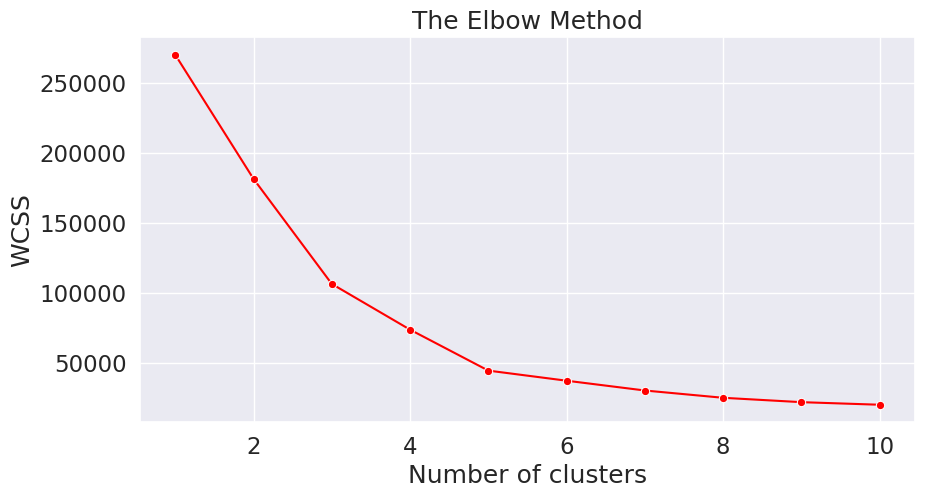

In [198]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red') # Pass x and y as keyword arguments.
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [199]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


<a id="7"></a>
## 7. Visualisation

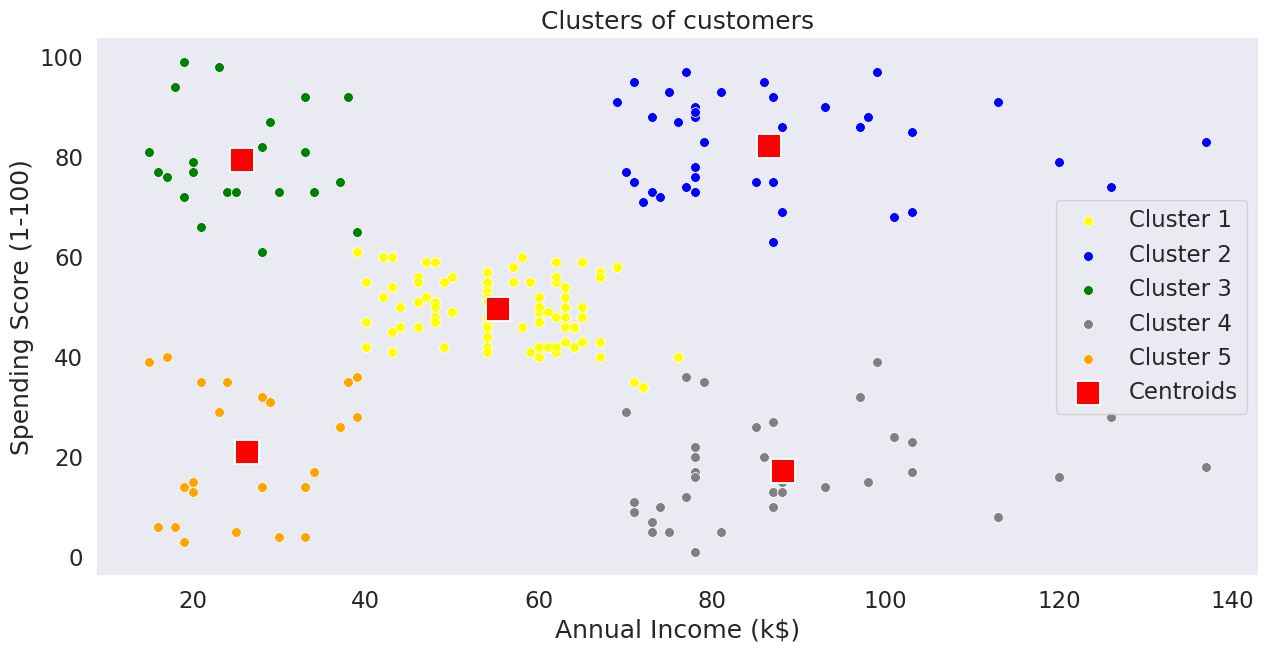

In [201]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50) # Pass x and y as keyword arguments.
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50) # Pass x and y as keyword arguments.
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50) # Pass x and y as keyword arguments.
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50) # Pass x and y as keyword arguments.
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50) # Pass x and y as keyword arguments.
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red', # Pass x and y as keyword arguments.
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Big Thanks to:

* https://www.datascience.com/blog/k-means-clustering
* https://www.superdatascience.com
* https://www.udemy.com


<h1 style="text-align:center"> Machine Learning Hands-On Parte 4 </h1>

## Visão geral

Para empresas de varejo, os sistemas de recomendação melhoram a experiência do cliente e, portanto, podem aumentar as vendas.

Este notebook mostra como você pode usar os recursos multimodais do modelo Gemini Pro Vision para criar rapidamente um sistema de recomendação multimodal pronto para uso.

## Scenario

O cliente mostra sua sala de estar:

|Foto do cliente |
|:-----:|
|<img src="https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/rooms/spacejoy-c0JoR_-2x3E-unsplash.jpg" width="80%">  |



Abaixo há quatro opções de cadeiras que o cliente está tentando decidir em sua compra:

|Cadeira 1| Cadeira 2 | Cadeira 3 | cadeira 4 |
|:-----:|:----:|:-----:|:----:|
| <img src="https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/furnitures/cesar-couto-OB2F6CsMva8-unsplash.jpg" width="80%">|<img src="https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/furnitures/daniil-silantev-1P6AnKDw6S8-unsplash.jpg" width="80%">|<img src="https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/furnitures/ruslan-bardash-4kTbAMRAHtQ-unsplash.jpg" width="80%">|<img src="https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/furnitures/scopic-ltd-NLlWwR4d3qU-unsplash.jpg" width="80%">|


Você terá aqui um exercício de como utilizar o `Gemini Pro Vision` para acelerar a solução deste tipo de cenário.

### Objetivos

Seu principal objetivo é aprender como criar um sistema de recomendação que possa fornecer recomendações e explicações usando um modelo multimodal..

Neste notebook, você começará com uma cena (por exemplo, uma sala de estar) e usará o modelo para realizar a compreensão visual. Você também investigará como o modelo pode ser usado para recomendar um item (por exemplo, uma cadeira) de uma lista de itens de mobiliário como entrada ou  até gerar algo 100% personalizado.


### Custos

Este tutorial usa componentes faturáveis do Google Cloud:

- Vertex AI

Leia mais sobre [preço do Vertex AI ](https://cloud.google.com/vertex-ai/pricing) e uso o [Calculador de Preço](https://cloud.google.com/products/calculator/) para gerar uma estimativa de custo com base no uso projetado.


## Primero vamos instalar todas as bibliotecas / dependências necessárias

In [202]:
! pip3 install --upgrade --user google-cloud-aiplatform pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 69.8 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [203]:
!pip3 install tensorflow-text

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 38.5 MB/s eta 0:00:00


In [204]:
!pip3 install cohere umap-learn altair annoy datasets tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.3/221.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.0 MB/s eta 0:00:00
   ━━

In [205]:
!pip3 install --upgrade cohere

In [206]:
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 3.8 MB/s eta 0:00:00


In [207]:
!pip install "jax[cuda12_pip]==0.4.23" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html

Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.9/378.9 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.2/573.2 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 51.2 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found

### **Reinicie o kernel do notebook**

Execute a célula abaixo para realizar o restart do kernel do notebook (etapa importante para que o Colab reconheça a nova versão da SDK)

In [208]:
import IPython
import time

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## Agora vamos fazer todas as configurações de ambiente

### **Autentique o seu ambiente de notebook**

Execute a célula abaixo para realizar a autenticação da sua sessão de notebook com a Google Cloud Esse passo é importante **para utilização no Colab** para garantir que as chamadas a APIs de Google Cloud funcionem sem problemas.

[Vertex AI Workbench](https://cloud.google.com/vertex-ai-workbench).


In [1]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

### **Defina o projeto Google Cloud a ser utilizado**

Execute a célula abaixo para definir qual projeto Google Cloud será utilizado pelo Colab na execução deste notebook.


In [2]:
# Define project information

PROJECT_ID = "vinicaridateste"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

# if not running on colab, try to get the PROJECT_ID automatically
if "google.colab" not in sys.modules:
    import subprocess

    PROJECT_ID = subprocess.check_output(
        ["gcloud", "config", "get-value", "project"], text=True
    ).strip()

print(f"Your project ID is: {PROJECT_ID}")

Your project ID is: vinicaridateste


In [3]:
import sys

if "google.colab" in sys.modules:
    # Initialize Vertex AI
    import vertexai

    vertexai.init(project=PROJECT_ID, location=LOCATION)

### Importe as bibliotecas necessárias


In [4]:
import cohere
import numpy as np
import re
import pandas as pd
from tqdm import tqdm
from datasets import load_dataset
import umap
import altair as alt
from sklearn.metrics.pairwise import cosine_similarity
from annoy import AnnoyIndex
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

In [5]:
from IPython.display import Markdown, display
from vertexai.preview.generative_models import (
    Content,
    GenerationConfig,
    GenerationResponse,
    GenerativeModel,
    Image,
    Part,
)
from vertexai.language_models import TextEmbeddingModel

In [6]:
import getpass
api_key = getpass.getpass("enter your co.here api token")

enter your co.here api token··········


In [7]:
from vertexai.preview.generative_models import GenerativeModel, Image

## Importação e configuração para geração de imagem

In [8]:
!nvidia-smi

Tue Sep 10 02:37:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [9]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

text_encoder/pytorch_model.fp16.safetensors not found


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

pytorch_model.fp16.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

pytorch_model.fp16.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.non_ema.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

(…)fusion_pytorch_model.non_ema.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


In [10]:
pipe = pipe.to("cuda")

### Carregando o modelo

In [11]:
multimodal_model = GenerativeModel("gemini-pro-vision")

### Vamos definir funções auxiliares

In [12]:
import http.client
import io
import typing
import urllib.request

import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps

def display_image(image: Image,
                  max_width: int = 600,
                  max_height: int = 350) -> None:
    pil_image = typing.cast(PIL_Image.Image, image._pil_image)
    if pil_image.mode != "RGB":
        # Modes such as RGBA are not yet supported by all Jupyter environments
        pil_image = pil_image.convert("RGB")
    image_width, image_height = pil_image.size
    if max_width < image_width or max_height < image_height:
        # Resize to display a smaller notebook image
        pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
    display_image_compressed(pil_image)


def display_image_compressed(pil_image: PIL_Image.Image) -> None:
    image_io = io.BytesIO()
    pil_image.save(image_io, "jpeg", quality=80, optimize=True)
    image_bytes = image_io.getvalue()
    ipython_image = IPython.display.Image(image_bytes)
    IPython.display.display(ipython_image)


def get_image_bytes_from_url(image_url: str) -> bytes:
    with urllib.request.urlopen(image_url) as response:
        response = typing.cast(http.client.HTTPResponse, response)
        if response.headers["Content-Type"] not in ("image/png", "image/jpeg"):
            raise Exception("Image can only be in PNG or JPEG format")
        image_bytes = response.read()
    return image_bytes


def load_image_from_url(image_url: str) -> Image:
    image_bytes = get_image_bytes_from_url(image_url)
    return Image.from_bytes(image_bytes)


def print_multimodal_prompt(contents: list):
    """
    Given contents that would be sent to Gemini,
    output the full multimodal prompt for ease of readability.
    """
    for content in contents:
        if isinstance(content, Image):
            display_image(content)
        else:
            print(content)

## Tudo pronto, hora de fazer funcionar!

### Compreensão visual com `Gemini Pro Vision`

Aqui você pedirá ao modelo Gemini Pro Vision para descrever uma sala em detalhes a partir de sua imagem. Para fazer isso você precisa **combinar texto e imagem em um único prompt**.

-------Prompt--------
Descreva o que é visível nesta sala e sua atmosfera geral:


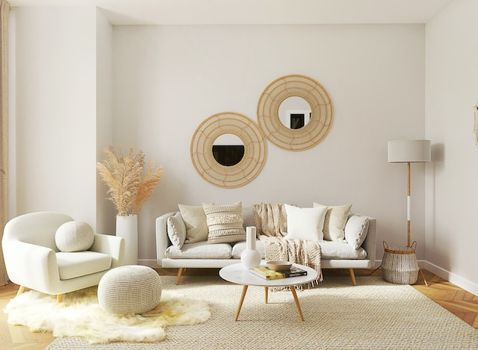


-------Resposta--------
 A sala é decorada com um estilo moderno e minimalista. As paredes são pintadas de branco e o chão é de madeira clara. A mobília é simples e elegante, com linhas retas e cores neutras. A sala é bem iluminada e tem uma atmosfera acolhedora e relaxante.

In [13]:
# urls for room images
room_image_url = "https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/rooms/spacejoy-c0JoR_-2x3E-unsplash.jpg"

# load room images as Image Objects
room_image = load_image_from_url(room_image_url)

prompt = "Descreva o que é visível nesta sala e sua atmosfera geral:"
contents = [
    prompt,
    room_image,
]

responses = multimodal_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Resposta--------")
for response in responses:
    print(response.text, end="")

### Gerando recomendações abertas com base em conhecimento integrado

Usando a mesma imagem, você pode pedir ao modelo que recomende **um móvel** que caiba nele junto com a descrição do ambiente.

Observe que o modelo pode escolher **qualquer móvel** recomendado neste caso, e pode fazê-lo a partir de seu único conhecimento integrado.

-------Prompt--------
Recomende um novo móvel para esta sala:


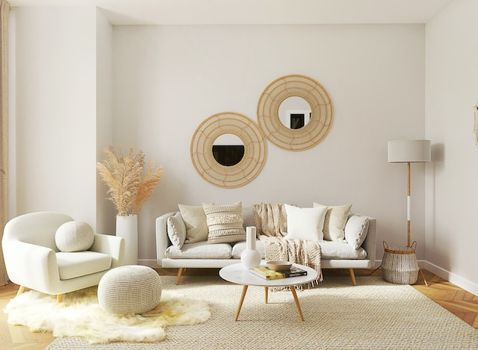

e explique a razão em detalhes

-------Resposta--------
 A sala é decorada em estilo escandinavo, que é caracterizado pelo uso de cores claras, móveis simples e linhas retas. A sala é bem iluminada e tem um visual clean e arejado.

Um bom móvel para esta sala seria uma poltrona confortável. A poltrona pode ser de qualquer cor, mas deve ser de um material que combine com o estilo da sala. Por exemplo, uma poltrona de couro seria uma ótima opção.

A poltrona deve ser colocada em um lugar confortável da sala, onde as pessoas possam sentar e relaxar. Por exemplo, a poltrona pode ser colocada em frente à TV ou em um canto da sala.

A poltrona é um móvel versátil que pode ser usado para várias coisas. As pessoas podem sentar na poltrona para ler, assistir TV ou simplesmente relaxar. A poltrona também pode ser usada para receber convidados.

In [14]:
prompt1 = "Recomende um novo móvel para esta sala:"
prompt2 = "e explique a razão em detalhes"
contents = [
    prompt1,
    room_image,
    prompt2
]

responses = multimodal_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Resposta--------")
for response in responses:
    print(response.text, end="")

-------Prompt--------
Descreva esta sala:


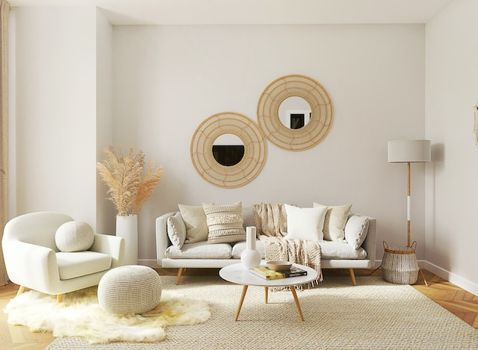

e recomende um tipo de tapete que caiba nele. Um tapete grande e neutro com padrão geométrico ajudaria a definir o espaço e adicionaria um toque de aconchego.

-------Response--------
 Esta sala de estar tem um estilo moderno e minimalista. As paredes são pintadas de branco e o chão é de madeira clara. O mobiliário é composto por um sofá cinza, uma poltrona branca, uma mesa de centro de madeira e um aparador. A decoração é composta por espelhos, vasos e plantas.

Um tapete grande e neutro com padrão geométrico ajudaria a definir o espaço e adicionaria um toque de aconchego. O tapete também ajudaria a proteger o chão de madeira de arranhões e danos.

In [15]:
prompt1 = "Descreva esta sala:"
prompt2 = "e recomende um tipo de tapete que caiba nele. Um tapete grande e neutro com padrão geométrico ajudaria a definir o espaço e adicionaria um toque de aconchego."
contents = [
    prompt1,
    room_image,
    prompt2
]

responses = multimodal_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
for response in responses:
    print(response.text, end="")

Na próxima célula, você pedirá ao modelo que recomende **um tipo de cadeira** que caiba nela junto com a descrição do ambiente.

Observe que o modelo pode escolher **qualquer tipo de cadeira** para recomendar neste caso.

-------Prompt--------
Descreva esta sala:


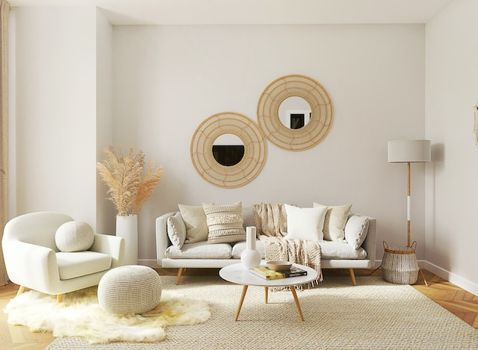

e recomende um tipo de cadeira que combine com ela

-------Resposta--------
 Esta sala de estar tem um estilo moderno e minimalista, com uma decoração clean e poucos móveis. As paredes são pintadas de branco e o piso é de madeira clara. O sofá é cinza-claro e a poltrona é branca. A mesa de centro é de madeira e o tapete é bege. A decoração é composta por alguns quadros, espelhos e plantas.

Uma cadeira que combinaria com esta sala seria uma cadeira de design moderno, com linhas retas e cores neutras. A cadeira poderia ser estofada em couro ou tecido e ter uma base de metal ou madeira.

In [16]:
prompt1 = "Descreva esta sala:"
prompt2 = "e recomende um tipo de cadeira que combine com ela"
contents = [
    prompt1,
    room_image,
    prompt2
]

responses = multimodal_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Resposta--------")
for response in responses:
    print(response.text, end="")

## Gerando recomendações

### Gerando imagem a partir da descrição:
Para uma recomendação 100% personalizada, podemos “criar” um novo produto com base em recomendações anteriores. Isso é útil para empresas que fabricam móveis personalizados.

### Com base nas imagens fornecidas:
Em vez de manter a recomendação aberta, você também pode fornecer uma lista de itens para o modelo escolher. Aqui você baixará algumas imagens de cadeiras e as definirá como opções para o modelo Gemini recomendar. Isto é particularmente útil para empresas de varejo que desejam fornecer recomendações aos usuários com base no tipo de quarto que possuem e nos itens disponíveis que a loja oferece.

In [17]:
#from PIL import Image
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = PIL_Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

  0%|          | 0/50 [00:00<?, ?it/s]

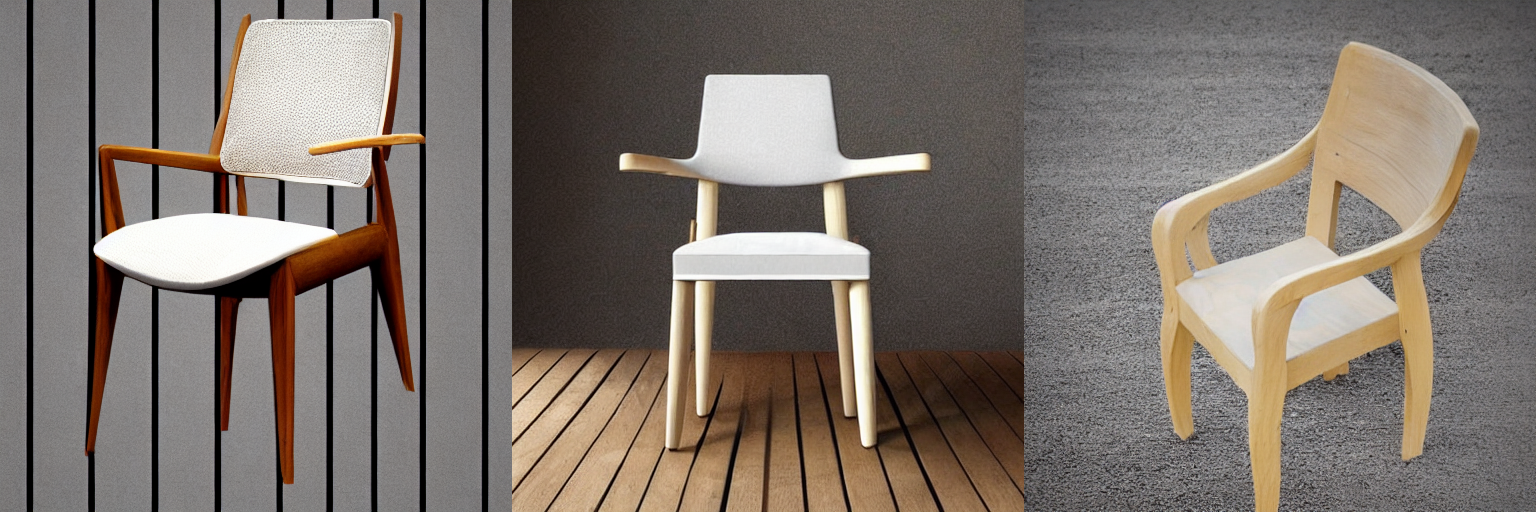

In [18]:
num_images = 3
prompt = ["Generate a photo of a wooden chair with a simple and modern design. The chair could have a seat and back upholstered in a light-colored fabric. The chair could also have wooden arms and legs."] * num_images

images = pipe(prompt).images

grid = image_grid(images, rows=1, cols=3)
grid

-------Prompt--------
Considere as seguintes cadeiras:
cadeira 1:


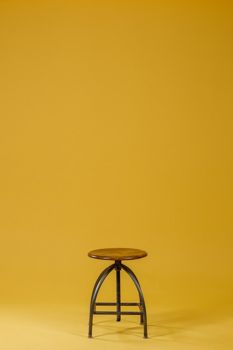

cadeira 2:


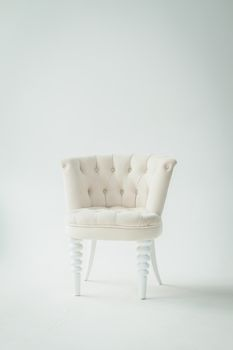

cadeira 3:


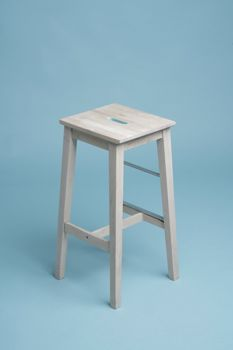

cadeira 4:


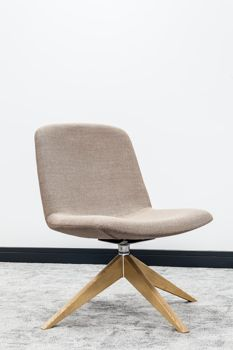

sala:


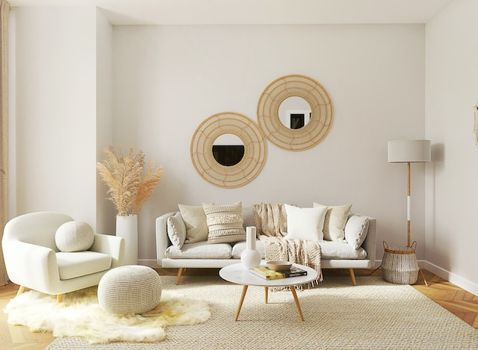

Você é um designer de interiores. Para cada cadeira, explique se ela seria apropriada ou não para o estilo da sala. Sumarize quais as duas melhores opções de cadeira:

-------Resposta--------
 A cadeira 1 é um banquinho de madeira com um design industrial. Ela não seria apropriada para o estilo da sala, pois é muito simples e não combina com o estilo clean e moderno da sala.

A cadeira 2 é uma poltrona de veludo branco com um design clássico. Ela seria apropriada para o estilo da sala, pois é elegante e combina com o estilo clean e moderno da sala.

A cadeira 3 é um banquinho de madeira com um design moderno. Ela não seria apropriada para o estilo da sala, pois é muito simples e não combina com o estilo clean e moderno da sala.

A cadeira 4 é uma cadeira giratória com um design moderno. Ela seria apropriada para o estilo da sala, pois é elegante e combina com o estilo clean e moderno da sala.

As duas melhores opções de cadeira são a cadeira 2 e a cadeira 4.

In [19]:
# Download and display sample chairs
furniture_image_urls = [
    "https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/furnitures/cesar-couto-OB2F6CsMva8-unsplash.jpg",
    "https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/furnitures/daniil-silantev-1P6AnKDw6S8-unsplash.jpg",
    "https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/furnitures/ruslan-bardash-4kTbAMRAHtQ-unsplash.jpg",
    "https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/furnitures/scopic-ltd-NLlWwR4d3qU-unsplash.jpg",
]

# Load furniture images as Image Objects
furniture_images = [load_image_from_url(url) for url in furniture_image_urls]

# To recommend an item from a selection, you will need to label the item number within the prompt.
# That way you are providing the model with a way to reference each image as you pose a question.
# Labelling images within your prompt also help to reduce hallucinations and overall produce better results.
contents = [
    "Considere as seguintes cadeiras:",
    "cadeira 1:", furniture_images[0],
    "cadeira 2:", furniture_images[1],
    "cadeira 3:", furniture_images[2],
    "cadeira 4:", furniture_images[3],
    "sala:",
    room_image,
    "Você é um designer de interiores. Para cada cadeira, explique se ela seria apropriada ou não para o estilo da sala. Sumarize quais as duas melhores opções de cadeira:",
]

responses = multimodal_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Resposta--------")
for response in responses:
    print(response.text, end="")

Você pode também pedir a resposta em algum formato específico, como JSON por exemplo, para simplificar a integração da resposta do modelo com algum sistema de recomendações já existente em seu ambiente:

-------Prompt--------
Considere as seguintes cadeiras:
cadeira 1:


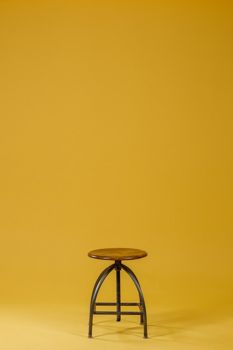

cadeira 2:


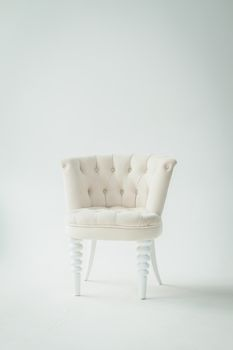

cadeira 3:


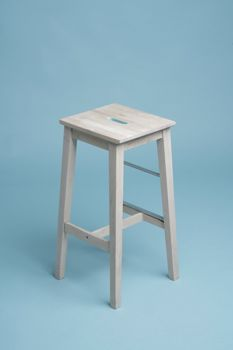

cadeira 4:


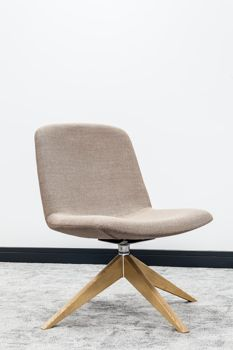

sala:


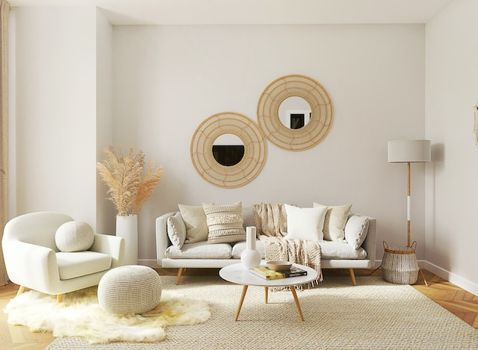

Você é um designer de interiores. Retorne em JSON, para cada cadeira, se ela seria uma boa escolha ou não para esta sala, incluindo uma explicação da decisão:

-------Resposta--------
 ```json
{
  "cadeira 1": {
    "escolha": "não",
    "explicação": "A cadeira 1 é uma cadeira de bar, com um design industrial. Ela não combina com o estilo da sala, que é mais clean e moderno."
  },
  "cadeira 2": {
    "escolha": "sim",
    "explicação": "A cadeira 2 é uma cadeira de estilo clássico, com um design elegante. Ela combina com o estilo da sala, que é mais clean e moderno."
  },
  "cadeira 3": {
    "escolha": "não",
    "explicação": "A cadeira 3 é uma cadeira de madeira, com um design simples. Ela não combina com o estilo da sala, que é mais clean e moderno."
  },
  "cadeira 4": {
    "escolha": "sim",
    "explicação": "A cadeira 4 é uma cadeira de design moderno, com um design elegante. Ela combina com o estilo da sala, que é mais clean e moderno."
  }
}
```

In [20]:
contents = [
    "Considere as seguintes cadeiras:",
    "cadeira 1:", furniture_images[0],
    "cadeira 2:", furniture_images[1],
    "cadeira 3:", furniture_images[2],
    "cadeira 4:", furniture_images[3],
    "sala:",
    room_image,
    "Você é um designer de interiores. Retorne em JSON, para cada cadeira, se ela seria uma boa escolha ou não para esta sala, incluindo uma explicação da decisão:",
]

responses = multimodal_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Resposta--------")
for response in responses:
    print(response.text, end="")